# ☁ Downnload librerie

Si installano di seguito le librerie necessarie allo svolgimento del progetto.

In [1]:
!pip install pennylane -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 88.8 MB/s eta 0:00:00


In [2]:
!pip install qiskit -q
!pip install qiskit-optimization -q
!pip install pylatexenc -q
!pip install matplotlib -q
!pip install qiskit_ibm_runtime -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.9/645.9 kB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 20.6 MB

In [3]:
!pip install ortools -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 7.1 MB/s eta 0:00:00


# ⬇ Importazione librerie

Si importano di seguito tutte le librerie utilizzate nel progetto.

In [4]:
import pennylane as qml
from pennylane import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from qiskit.quantum_info import SparsePauliOp
import numpy
import pennylane as qml

from scipy.optimize import minimize
from qiskit.primitives import StatevectorEstimator
from qiskit.primitives import StatevectorSampler

import time
from qiskit.circuit.library import TwoLocal
from ortools.sat.python import cp_model

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as IBMSampler
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.circuit.library import TwoLocal
from qiskit.result import Counts
from scipy.optimize import minimize

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


# ⚠️ Vertex Cover

Il **Vertex Cover** è un classico problema di ottimizzazione combinatoria su grafi, appartenente alla classe NP-hard. Dato un grafo non orientato \( G = (V, E) \), un **vertex cover** è un sottoinsieme di vertici \( C ⊆ V \) tale che **ogni arco \( (u, v) ∈ E \)** abbia **almeno uno dei due estremi** in \( C \).

In altre parole, il vertex cover "copre" tutti gli archi del grafo, perché per ogni collegamento c'è almeno un nodo nel sottoinsieme che lo tocca.

L'obiettivo del problema è **trovare il vertex cover di dimensione minima**, ovvero il più piccolo insieme di vertici che riesce comunque a coprire tutti gli archi del grafo.

✏️ Esempio

Considera il grafo con 5 nodi e 4 archi. Una possibile soluzione è selezionare i vertici 4 e 3, se questi coprono tutti gli archi. Tuttavia, ci può essere una soluzione più piccola, oppure con lo stesso numero di nodi ma diversa. Il problema consiste nel trovare **la soluzione migliore**.

\
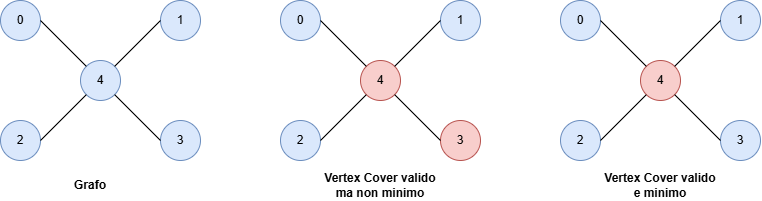


❓ Perché è importante?

Il vertex cover è un problema fondamentale nella teoria della complessità e trova applicazioni pratiche in diversi ambiti, tra cui:
- Progettazione di reti (minimizzare i punti di controllo)
- Bioinformatica (copertura di interazioni proteiche)
- Cybersecurity (monitoraggio di connessioni critiche)
- Scheduling e logistica

💡 Vertex Cover e Quantum Computing

Poiché il vertex cover è **computazionalmente difficile**, è un candidato ideale per testare algoritmi quantistici come **QAOA** (Quantum Approximate Optimization Algorithm) e **VQE** (Variational Quantum Eigensolver), che possono fornire soluzioni approssimate o guidare l’ottimizzazione sfruttando la natura probabilistica e parallela dei circuiti quantistici.

## 🧠 Formulazione Hamiltoniana del Vertex Cover

Una volta definito il problema del **Vertex Cover**, possiamo trasformarlo in una forma compatibile con l’ottimizzazione quantistica. Questo è possibile grazie alla **formulazione Ising o QUBO**, in cui il problema viene tradotto in un **Hamiltoniano quantistico**, il cui stato fondamentale (ground state) corrisponde alla soluzione ottima del problema.

🔧 Variabili binarie

Si associa a ciascun nodo \( v ∈ V \) una variabile binaria:

\[
xᵥ ∈ \{0, 1\}
\]

dove:
- \( xᵥ = 1 \) indica che il nodo \( v \) è incluso nel vertex cover,
- \( xᵥ = 0 \) altrimenti.

---

⚙️ Hamiltoniano di costo

L’obiettivo è **minimizzare il numero di vertici nel vertex cover**, cioè:

\[
Hᵦ = B ∑{xᵥ} per {v ∈ V}
\]

dove \( B > 0 \) è un parametro che penalizza ogni vertice incluso nella soluzione.

---

🔒 Hamiltoniano di vincolo

Per garantire che ogni **arco** \( (u, v) \in E \) sia "coperto" (cioè almeno un estremo incluso), si introduce un termine di penalità:

\[
Hₐ = A ∑ (1 - xᵤ)(1 - xᵥ) per {(u,v) ∈ E}
\]

Questo termine assume valore zero **solo se almeno uno tra \( xᵤ \) o \( xᵥ \) è 1**, cioè se l’arco è coperto. Se nessuno dei due lo è, il termine vale \( A \), penalizzando la violazione del vincolo.

---

🧮 Hamiltoniano totale

Il problema del vertex cover viene così scritto come il minimo dell’Hamiltoniano totale:

\[
H = Hₐ + Hᵦ
\]

- Il termine \( Hₐ \) impone i **vincoli** del problema (copertura degli archi).
- Il termine \( Hᵦ \) impone l’**ottimizzazione**, cercando il vertex cover più piccolo possibile.

> ⚖️ **Condizione sui parametri**: si sceglie \( A > B \) per garantire che i vincoli vengano sempre rispettati prima di ottimizzare il costo.


> 🧩 *Come descritto nel paper*, le variabili binarie \( xᵥ ∈ \{0, 1\} \) vengono mappate nei qubit mediante la trasformazione:
> \[
> xᵥ = $\frac{1 + s_v}{2}$, $\quad$ $\text{con}$ $\quad$ sᵥ ∈ \{-1, +1\}
> \]
> dove \( sᵥ \) rappresenta la variabile di spin dell'Ising model associata al qubit corrispondente.


---

🔗 Connessione con la meccanica quantistica

Una volta definito \( H \), è possibile implementare l’algoritmo VQE o QAOA per **trovare approssimazioni del ground state**, ovvero **soluzioni approssimate** al problema del vertex cover. I bitstring misurati corrispondono a configurazioni di nodi, e il valore dell’Hamiltoniano quantifica quanto "buona" è la soluzione.

Questa formulazione consente di mappare problemi NP-hard in forma fisica quantistica, aprendo la strada a nuovi approcci di calcolo.

📖 Fonte: *Lucas, A. (2014). Ising formulations of many NP problems. Frontiers in Physics.*


## 🛠 Funzioni di Utilità

In questa sezione sono raccolte le **funzioni di supporto** utilizzate nel progetto per rappresentare, valutare e visualizzare le soluzioni al problema del Vertex Cover.

Queste funzioni non fanno parte del cuore dell’algoritmo quantistico (come VQE o QAOA), ma sono fondamentali per:

- Verificare la **validità delle soluzioni**.
- Calcolare il **costo** associato a una data configurazione.
- Mostrare **graficamente** le soluzioni.
- **Convertire** l'Hamiltoniana dal formato utilizzato in Pennylane al formato utilizzato in Qiskit.

In [5]:
def plot_vertex_cover(graph_edges, solution):
    """
    Visualizza il grafo con i nodi colorati in base alla soluzione del Vertex Cover.

    Args:
        graph_edges (list of tuple): Lista di archi (es. [[0,1], [1,2], ...])
        solution (str or list): Bitstring (es. '00100' o [0,0,1,0,0])
    """
    G = nx.Graph()
    G.add_edges_from(graph_edges)

    if isinstance(solution, str):
        solution = [int(b) for b in solution]

    node_colors = ["red" if bit == 1 else "lightblue" for bit in solution]

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800,
            font_size=14, edge_color="gray", width=2)
    plt.title("Vertex Cover - Nodi rossi inclusi nel cover")
    plt.show()

In [6]:
def is_valid_vertex_cover(bitstring, graph):
    """Controlla se tutti gli archi sono coperti."""
    cover = [i for i, b in enumerate(bitstring) if b == '1']
    for u, v in graph:
        if u not in cover and v not in cover:
            return False
    return True

In [7]:
def evaluate_vertex_cover_cost(bitstring, A,B):
    """Restituisce il costo del vertex cover trovato"""
    numero_nodi_nel_cover = sum(int(b) for b in bitstring)*B
    penalita_archi_non_coperti = 0
    for u, v in graph:
        if bitstring[u] == '0' and bitstring[v] == '0':
            penalita_archi_non_coperti += A
    return numero_nodi_nel_cover + penalita_archi_non_coperti

In [8]:
def qml_to_sparse_pauli_op(qml_h, node_number):
    pauli_labels = []
    coeffs = []

    for coeff, op in zip(qml_h.coeffs, qml_h.ops):
        label = ['I'] * node_number

        if hasattr(op, "obs"):
            for o in op.obs:
                if o.name == "Identity":
                    label[o.wires[0]] = 'I'
                else:
                    label[o.wires[0]] = o.name[-1].upper()

        elif hasattr(op, 'name'):
            if op.name == "Identity":
                label[op.wires[0]] = 'I'
            else:
                label[op.wires[0]] = op.name[-1].upper()

        else:
            raise ValueError(f"Operatore non riconosciuto: {op}")

        pauli_str = ''.join(label[::-1])
        pauli_labels.append(pauli_str)
        coeffs.append(coeff)

    return SparsePauliOp(pauli_labels, coeffs=numpy.array(coeffs, dtype=complex))



## 🕸️ Definizione del grafo

Per gli scopi di questo progetto, definiamo un grafo d'esempio utilizzando la **lista degli archi** (*edge list*) come rappresentazione.

Il grafo mostrato di seguito è puramente esemplificativo e può essere modificato liberamente in base alle esigenze sperimentali.

Poiché ogni nodo del grafo viene mappato su un **qubit** nei circuiti quantistici, la **dimensione del grafo determina direttamente il numero di qubit richiesti**. Per questo motivo, in questo progetto si è scelto un grafo con **8 nodi**, un valore che rappresenta un **buon compromesso** tra:

- la **complessità computazionale** per i simulatori classici (VQE, QAOA)
- le **limitazioni pratiche** imposte dagli attuali **backend quantistici reali**, che supportano un numero limitato di qubit fisici con topologie e qualità variabili.

Questa dimensione permette di eseguire esperimenti significativi sia su **simulatori classici**, sia su **hardware reale IBM**, mantenendo al contempo tempi di esecuzione e risorse computazionali sotto controllo.

🔢 Capacità realistiche dei backend quantistici

| Tipo di esecuzione         | Qubit utilizzabili (consigliati) | Note principali                                                                 |
|----------------------------|----------------------------------|----------------------------------------------------------------------------------|
| Simulatore classico VQE    | Fino a **14–16**                 | Complessità esponenziale; uso elevato di RAM e CPU                              |
| Simulatore classico QAOA   | Fino a **20–25**                 | Circuiti poco profondi (es. `reps=1`); gestione ancora accessibile               |
| Backend IBM reale (es. `ibm_torino`) | **5–12** consigliati         | Nonostante i 133 qubit, uso limitato da connettività, profondità e rumore       |

> 📌 *Nota:* anche se alcuni sistemi IBM Quantum, come `ibm_torino`, offrono oltre 100 qubit fisici, nella pratica è consigliabile utilizzare un sottoinsieme ben connesso e stabile, soprattutto in esperimenti variational come VQE e QAOA, che sono sensibili al rumore e alla profondità dei circuiti.




In [9]:
graph = [[0,2],[1,2],[2,3],[2,4],[1,5],[1,6],[4,7],[1,7],[2,6]]

### Visualizzazione del grafo

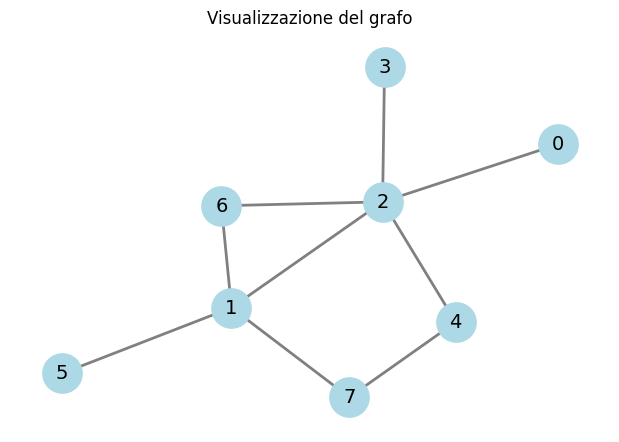

In [ ]:
G = nx.Graph()
G.add_edges_from(graph)


pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800, font_size=14, edge_color="gray", width=2)
plt.title("Visualizzazione del grafo")
plt.show()

## 🏛️ Risoluzione Classica

Prima di applicare gli algoritmi quantistici, è utile risolvere il problema del Vertex Cover utilizzando un approccio classico. Questo consente di ottenere una **soluzione ottima di riferimento**, necessaria per confrontare la qualità delle soluzioni approssimate generate dagli algoritmi quantistici.

---

La funzione `solve_vertex_cover_ortools(...)` implementa il modello nel seguente modo:

- Si associa a ogni nodo \( i \) una variabile binaria \( xᵢ ∈ \{0, 1\} \) che indica se il nodo è incluso nel cover.
- Per ogni arco \( (u, v) ∈ E \), si impone il **vincolo logico**:
  
  \[
  xᵤ $\lor$ xᵥ = 1
  \]
  
  che assicura che almeno uno dei due nodi copra l’arco.
  
- L’obiettivo è minimizzare la somma:
  
  \[
    $\min$ $\sum_{i=0}^{n-1}$ B ⋅ xᵢ
  \]
  
  cioè ridurre al minimo il numero (o costo) dei nodi selezionati.

---

💡 Vantaggi del metodo

- Il CP-SAT solver permette di risolvere in modo efficiente anche grafi di dimensione medio-grande.
- Il modello è esatto: fornisce **soluzioni ottime certificate**, rispettando tutti i vincoli del problema.
- La funzione restituisce sia il **vertex cover minimo trovato**, sia il **costo associato**, utile per confronti diretti con VQE e QAOA.

---

🎯 Obiettivo della risoluzione classica

Questa fase serve a fornire:

- Un **valore di riferimento** del costo ottimo.
- Una **validazione** per verificare se le soluzioni trovate dagli algoritmi quantistici sono corrette o vicine all’ottimo.
- Un confronto tra **efficienza classica e quantistica**, soprattutto su problemi piccoli dove la soluzione classica è ancora calcolabile in tempi ragionevoli.

---

📌 In sintesi, la risoluzione classica rappresenta lo standard con cui misurare le prestazioni delle tecniche quantistiche.

In [10]:
def solve_vertex_cover_ortools(graph, n_nodes, A=2.0, B=1.0, verbose=True):
    """
    Risolve il problema del Vertex Cover usando OR-Tools CP-SAT.

    Args:
        graph (list of list): lista di archi, es. [[0, 1], [1, 2]]
        n_nodes (int): numero di nodi nel grafo
        A (float): penalità per archi non coperti (usato solo se si vogliono confrontare costi)
        B (float): costo per ogni nodo nel cover (default 1.0)
        verbose (bool): se True stampa dettagli

    Returns:
        list: lista di nodi nel vertex cover minimo
    """
    model = cp_model.CpModel()

    x = [model.NewBoolVar(f'x{i}') for i in range(n_nodes)]

    for u, v in graph:
        model.AddBoolOr([x[u], x[v]])

    model.Minimize(sum(x[i] * B for i in range(n_nodes)))

    solver = cp_model.CpSolver()
    status = solver.Solve(model)

    if status in (cp_model.OPTIMAL, cp_model.FEASIBLE):
        cover = [i for i in range(n_nodes) if solver.Value(x[i]) == 1]
        cost = sum(B for i in cover)
        if verbose:
            print(f"Vertex Cover trovato: {cover}")
            print(f"Cardinalità: {len(cover)}")
            print(f"Costo totale: {cost}")
        return cover,cost
    else:
        if verbose:
            print("Nessuna soluzione trovata.")
        return None


In [11]:
node_number = max(max(u, v) for u, v in graph) + 1

start = time.time()
cover, real_solution_cost = solve_vertex_cover_ortools(graph, node_number)
end = time.time()
tempo = end-start
print(f"Tempo di esecuzione: {tempo} secondi")

Vertex Cover trovato: [1, 2, 7]
Cardinalità: 3
Costo totale: 3.0
Tempo di esecuzione: 0.015115022659301758 secondi


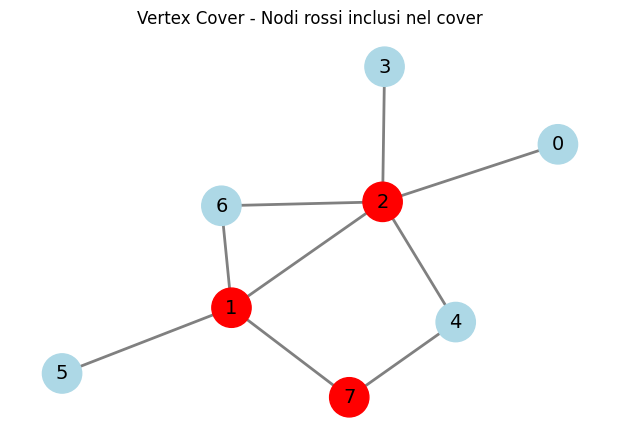

----------------------------------------
Costo minimo reale = 3.0
----------------------------------------


In [13]:
plot_vertex_cover(graph, [1 if i in cover else 0 for i in range(node_number)])
print("----------------------------------------")
print("Costo minimo reale =",real_solution_cost)
print("----------------------------------------")

## ⚛️ Risoluzione con QAOA

### Definizione dei Parametri per QAOA

In [10]:
node_number = max(max(u, v) for u, v in graph) + 1
n_wires = node_number

dev = qml.device("default.qubit", wires=n_wires) #device

p=5       #numero di livelli per QAOA
params=np.ones((p, 2),requires_grad=True) * 0.1     #parametri iniziali per QAOA
mixer_h = qml.Hamiltonian([1.0] * n_wires, [qml.PauliX(i) for i in range(n_wires)]) #H_mixer

### Funzione per costruire $H_f$

In [12]:
A=2.0
B=1.0

In [12]:
def build_h_cost_vertex_cover(graph, A, B):
    """Cost Hamiltonian per il problema del Vertex Cover.

    Args:
        graph (list[list[int]]): Lista degli archi del grafo.
        A (float): Coefficiente di penalità per i vincoli sugli archi.
        B (float): Coefficiente per minimizzare la dimensione del cover.

    Returns:
        qml.Hamiltonian: L'Hamiltoniano del problema Vertex Cover.
    """
    n_nodes = max(max(u, v) for u, v in graph) + 1
    list_coeff = []
    list_observables = []

    # Penalità per archi non coperti
    for u, v in graph:
        list_coeff.append(A / 4)
        list_observables.append(qml.PauliZ(u) @ qml.PauliZ(v))
        list_coeff.append(A / 4)
        list_observables.append(qml.PauliZ(u))
        list_coeff.append(A / 4)
        list_observables.append(qml.PauliZ(v))
        list_coeff.append(A / 4)
        list_observables.append(qml.Identity(0))

    # Penalità per ogni nodo nel cover
    for i in range(n_nodes):
        list_coeff.append(B / 2)
        list_observables.append(qml.Identity(0))
        list_coeff.append(-B / 2)
        list_observables.append(qml.PauliZ(i))

    return qml.Hamiltonian(list_coeff, list_observables)


In [13]:
cost_h = build_h_cost_vertex_cover(graph,A,B)
print("Problem hamiltonian = ",cost_h)

Problem hamiltonian =  0.5 * (Z(0) @ Z(2)) + 0.5 * Z(0) + 0.5 * Z(2) + 0.5 * I(0) + 0.5 * (Z(1) @ Z(2)) + 0.5 * Z(1) + 0.5 * Z(2) + 0.5 * I(0) + 0.5 * (Z(2) @ Z(3)) + 0.5 * Z(2) + 0.5 * Z(3) + 0.5 * I(0) + 0.5 * (Z(2) @ Z(4)) + 0.5 * Z(2) + 0.5 * Z(4) + 0.5 * I(0) + 0.5 * (Z(1) @ Z(5)) + 0.5 * Z(1) + 0.5 * Z(5) + 0.5 * I(0) + 0.5 * (Z(1) @ Z(6)) + 0.5 * Z(1) + 0.5 * Z(6) + 0.5 * I(0) + 0.5 * (Z(4) @ Z(7)) + 0.5 * Z(4) + 0.5 * Z(7) + 0.5 * I(0) + 0.5 * (Z(1) @ Z(7)) + 0.5 * Z(1) + 0.5 * Z(7) + 0.5 * I(0) + 0.5 * (Z(2) @ Z(6)) + 0.5 * Z(2) + 0.5 * Z(6) + 0.5 * I(0) + 0.5 * I(0) + -0.5 * Z(0) + 0.5 * I(0) + -0.5 * Z(1) + 0.5 * I(0) + -0.5 * Z(2) + 0.5 * I(0) + -0.5 * Z(3) + 0.5 * I(0) + -0.5 * Z(4) + 0.5 * I(0) + -0.5 * Z(5) + 0.5 * I(0) + -0.5 * Z(6) + 0.5 * I(0) + -0.5 * Z(7)


### Definizione del Circuito per QAOA

In [14]:
def qaoa_circuit(params,p,cost_h):
    """Implement the initial state and p layers of the QAOA ansatz.

    Args:
        params (np.array): An array with the trainable parameters of the QAOA ansatz.
        p (int): Number of layers of the QAOA ansatz.
        cost_h (qml.Hamiltonian): The cost Hamiltonian
    """

    for w in range(n_wires):
        qml.Hadamard(wires=w)

    for i in range(p):
        params_iteration = params[i]
        qml.qaoa.cost_layer(params_iteration[0], cost_h)
        qml.qaoa.mixer_layer(params_iteration[1], mixer_h)

### Funzione per restituire le probabilità

In [15]:
@qml.qnode(dev)
def expval_prob_QAOA_circuit(params,p,cost_h):
    """QAOA circuit which returns the probabilities.
    Args:
        params (np.array): An array with the trainable parameters of the QAOA ansatz.
        p (int): Number of layers of the QAOA ansatz.
        cost_h (qml.Hamiltonian): The cost Hamiltonian
    Returns:
        for the given hamiltonian: exp value, probs
    """

    qaoa_circuit(params,p,cost_h)
    exp_val = qml.expval(cost_h)
    return exp_val, qml.probs(wires=range(n_wires))


### Definizione dell'Ottimizzatore

In [16]:
def optimizer(params, p, cost_h, optimizer, tol=1e-4, max_steps=500):
    """
    Ottimizzatore QAOA che termina alla convergenza della funzione obiettivo.

    Args:
        params (np.array): Parametri iniziali QAOA.
        p (int): Numero di layer.
        cost_h (qml.Hamiltonian): Hamiltoniano del problema.
        optimizer: Istanza di ottimizzatore (es. qml.AdamOptimizer).
        tol (float): Soglia di convergenza sul cambiamento della funzione obiettivo.
        max_steps (int): Massimo numero di iterazioni.

    Returns:
        tuple: (parametri finali, numero di iterazioni, progressione della funzione di costos)
    """

    prev_cost = None
    steps = 0
    cost_progress = []

    def cost_fn(current_params):
        cost, _ = expval_prob_QAOA_circuit(current_params, p, cost_h)
        return np.real(cost)

    for step in range(max_steps):
        steps += 1
        current_cost = cost_fn(params)
        cost_progress.append(current_cost)
        params = optimizer.step(cost_fn, params)

        if prev_cost is not None:
            delta = abs(current_cost - prev_cost)
            if delta < tol:
                break

        prev_cost = current_cost

    return params, steps, cost_progress


### Visualizzazione del Circuito

(<Figure size 1400x900 with 1 Axes>, <Axes: >)

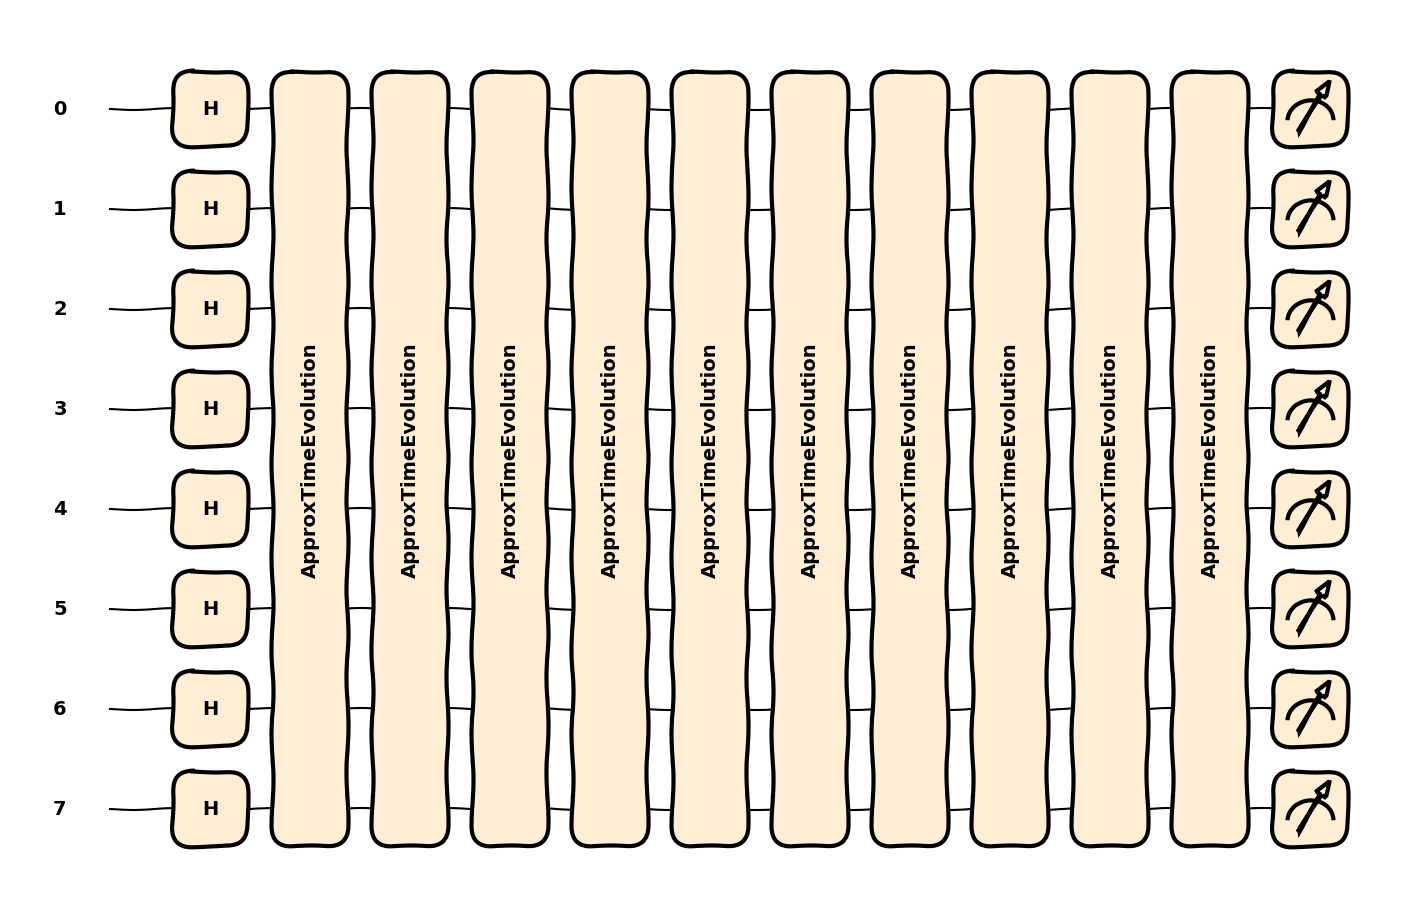

In [ ]:
drawer = qml.draw(expval_prob_QAOA_circuit)
qml.drawer.use_style('pennylane')
qml.drawer.use_style('sketch')
qml.draw_mpl(expval_prob_QAOA_circuit)(params,p,cost_h)

 ### Funzione per eseguire QAOA

In [17]:
def execute_QAOA(params,p,cost_h,current_optimazer):
    """Execute QAOA Algorithm.
    Args:
        params (np.array): An array with the trainable parameters of the QAOA ansatz.
        p (int): Number of layers of the QAOA ansatz.
        cost_h (qml.Hamiltonian): The cost Hamiltonian

    Returns:
        final_expval: final value of the expectation value.
        (np.tensor): A tensor with the final probabilities of measuring the quantum states.
        (np.array): The optimized parameters of the QAOA.
    """

    final_params, n_steps, cost_progress = optimizer(params, p, cost_h,current_optimazer)
    final_expval, final_probs = expval_prob_QAOA_circuit(final_params,p,cost_h)

    return final_expval, final_probs, final_params, n_steps, cost_progress

### Esecuzione dell'algortimo QAOA con 5 livelli e AdamOptimizer

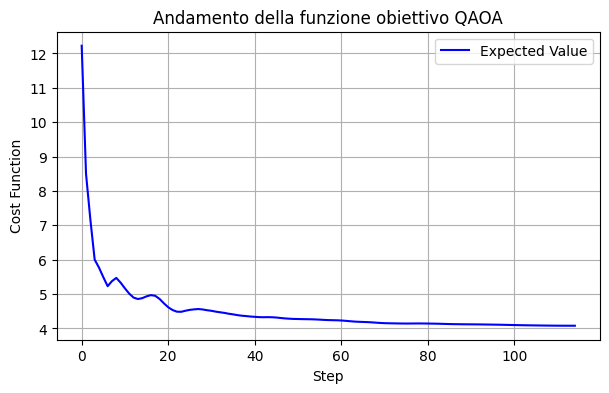

In [ ]:
adam_optimizer = qml.AdamOptimizer(stepsize=0.1)
final_expval, final_probs, final_params, n_steps, cost_progress = execute_QAOA(params,p,cost_h,adam_optimizer)

plt.figure(figsize=(7, 4))
plt.plot(cost_progress, 'b-', label="Expected Value")
plt.xlabel("Step")
plt.ylabel("Cost Function")
plt.title("Andamento della funzione obiettivo QAOA")
plt.grid(True)
plt.legend()
plt.show()

### Visualizzazione del risultato

In [ ]:
print("")
print("---------------------------------------------------")

bitstrings = [format(i, f"0{node_number}b") for i in range(2**node_number)]
costs = []
valid_solutions = []

for i, bitstring in enumerate(bitstrings):
    cost = evaluate_vertex_cover_cost(bitstring, A, B)
    prob = final_probs[i]
    if is_valid_vertex_cover(bitstring, graph) and prob > 0:
        costs.append((bitstring, cost, prob))
        valid_solutions.append(bitstring)
        print(f"{bitstring} : prob = {prob:.3f}; cost = {cost}")



f_feasible = sum(prob for (_, _, prob) in costs)
min_cost = min(cost for (_, cost, _) in costs)
best_solutions = [s for (s, cost, _) in costs if cost == min_cost]
best_probs = [p for (s, cost, p) in costs if cost == min_cost]

print(f"\nProbabilità di trovare una soluzione valida: {f_feasible:.3f}")
print("---------------------------------------------------")

print("Soluzioni migliori: \n")
for solution, prob in zip(best_solutions, best_probs):
    print(f"{solution} : prob = {prob:.3f}")

print("---------------------------------------------------")
print(f"Best costo trovato: {min_cost}")
print(f"Costo REALE minimo: {real_solution_cost}")  # Devi averlo calcolato con OR-Tools
print(f"Numero di passi impiegati dall'algoritmo: {len(cost_progress)}")
print(f"Valore atteso della funzione obiettivo: {final_expval:.4f}")
print("---------------------------------------------------")



---------------------------------------------------
00100111 : prob = 0.083; cost = 4.0
00101111 : prob = 0.003; cost = 5.0
00110111 : prob = 0.006; cost = 5.0
00111111 : prob = 0.001; cost = 6.0
01100001 : prob = 0.235; cost = 3.0
01100011 : prob = 0.013; cost = 4.0
01100101 : prob = 0.028; cost = 4.0
01100111 : prob = 0.003; cost = 5.0
01101000 : prob = 0.243; cost = 3.0
01101001 : prob = 0.026; cost = 4.0
01101010 : prob = 0.016; cost = 4.0
01101011 : prob = 0.001; cost = 5.0
01101100 : prob = 0.017; cost = 4.0
01101101 : prob = 0.001; cost = 5.0
01101110 : prob = 0.008; cost = 5.0
01101111 : prob = 0.001; cost = 6.0
01110001 : prob = 0.016; cost = 4.0
01110011 : prob = 0.002; cost = 5.0
01110101 : prob = 0.002; cost = 5.0
01110111 : prob = 0.000; cost = 6.0
01111000 : prob = 0.022; cost = 4.0
01111001 : prob = 0.002; cost = 5.0
01111010 : prob = 0.000; cost = 5.0
01111011 : prob = 0.000; cost = 6.0
01111100 : prob = 0.001; cost = 5.0
01111101 : prob = 0.000; cost = 6.0
01111110 : 

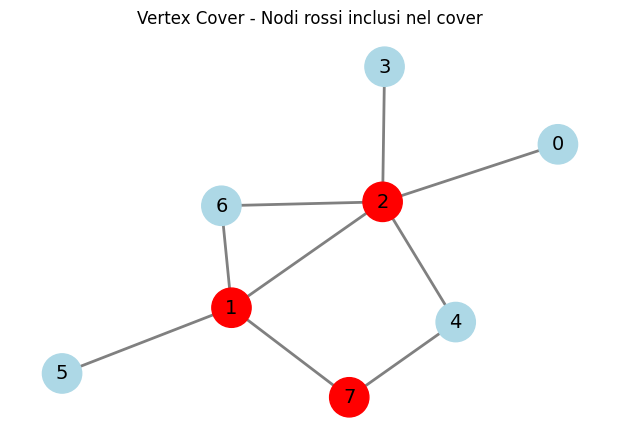

Con probabilità:  0.23498320132991848



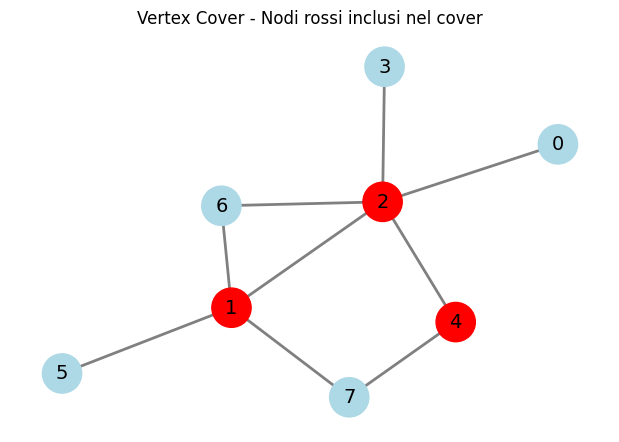

Con probabilità:  0.2428407777993905



In [ ]:
for soluzione, probabilita in zip(best_solutions,best_probs):
    plot_vertex_cover(graph, soluzione)
    print("Con probabilità: ",probabilita)
    print("")

### Analisi Profondità del Circuito

L’algoritmo QAOA (Quantum Approximate Optimization Algorithm) è controllato da un parametro intero \( p \), che rappresenta il **numero di layer** (o profondità) del circuito quantistico. Ogni layer aggiuntivo introduce una coppia di operatori: uno legato al problema (Hamiltoniano di costo) e uno alla mescolanza (mixer), aumentando così la **complessità del circuito** e la sua **capacità espressiva**.

Nel contesto di questo progetto, è stata eseguita QAOA per diversi valori di \( p \), al fine di:

- Osservare **come varia la qualità delle soluzioni** trovate al crescere della profondità
- Valutare l’**effetto della profondità sulla probabilità di soluzioni valide e ottime**
- Trovare un **compromesso ottimale** tra accuratezza e fattibilità pratica.

---

⚖️ Compromesso profondità vs. qualità

- Valori bassi di \( p \) (es. \( p = 1 \)) generano circuiti molto semplici e facilmente eseguibili, ma possono non essere abbastanza potenti da catturare soluzioni di buona qualità.
- Valori elevati di \( p \) (es. \( p = 4 \) o oltre) aumentano la precisione potenziale dell’algoritmo, ma portano a circuiti **più profondi**, **più lenti** da simulare e **più sensibili al rumore** in caso di esecuzione su hardware reale.

---

🔍 Obiettivo dell’analisi

Attraverso l’analisi per diversi \( p \), si cerca di individuare:

- Il **punto di saturazione**, oltre il quale aumentare la profondità non porta benefici significativi
- Il valore di \( p \) che fornisce il **miglior compromesso** tra qualità delle soluzioni e costi computazionali



In [18]:
def qaoa_sweep_p(graph, max_p=3, A=2.0, B=1.0):
    node_number = max(max(u, v) for u, v in graph) + 1
    dev = qml.device("default.qubit", wires=node_number)
    cost_h = build_h_cost_vertex_cover(graph, A, B)

    results = []

    for p in range(1, max_p + 1):
        print(f"\n===== Esecuzione QAOA con p = {p} =====")
        params = numpy.ones((p, 2), requires_grad=True) * 0.1
        optimizer = qml.AdamOptimizer(stepsize=0.1)

        start_time = time.time()
        final_expval, final_probs, final_params, n_steps, cost_progress = execute_QAOA(
            params, p, cost_h, optimizer
        )
        exec_time = time.time() - start_time

        bitstrings = [format(i, f"0{node_number}b") for i in range(2**node_number)]
        valid_solutions = []

        for i, bitstring in enumerate(bitstrings):
            prob = final_probs[i]
            if prob > 0:
                cost = evaluate_vertex_cover_cost(bitstring, A, B)
                if is_valid_vertex_cover(bitstring, graph):
                    valid_solutions.append((bitstring, cost, prob))

        if valid_solutions:
            min_cost = min(c for (_, c, _) in valid_solutions)
            best_solutions = [(s, p) for (s, c, p) in valid_solutions if c == min_cost]
            prob_feasible = sum(p for (_, _, p) in valid_solutions)
            prob_feasible_not_minimal = sum(p for (_, c, p) in valid_solutions if c != min_cost)
        else:
            min_cost = None
            best_solutions = []
            prob_feasible = 0

        results.append({
            "p": p,
            "expval": final_expval,
            "min_cost": min_cost,
            "best_solutions": best_solutions,
            "feasible_prob": prob_feasible,
            "n_steps": n_steps,
            "exec_time": exec_time,
            "feasible_prob_not_minimal": prob_feasible_not_minimal
        })

    return results


In [19]:
results = qaoa_sweep_p(graph, max_p=15, A=A, B=B)

for res in results:
    print("\n---------------------------------------------------")
    print(f"p = {res['p']}")
    print(f"Valore atteso (Hamiltonian): {res['expval']:.4f}")
    print(f"Numero passi ottimizzazione: {res['n_steps']}")
    print(f"Tempo di esecuzione: {res['exec_time']:.2f} s")
    print(f"Costo minimo trovato: {res['min_cost']}")
    print(f"Probabilità soluzioni valide: {res['feasible_prob']:.3f}")
    print(f"Probabilità di avere una soluzione valida ma non minima: {res['feasible_prob_not_minimal']}")
    print("\nSoluzioni con costo minimo:")
    for sol, prob in res['best_solutions']:
        print(f"  {sol} : prob = {prob:.3f}")
    print("---------------------------------------------------")



===== Esecuzione QAOA con p = 1 =====

===== Esecuzione QAOA con p = 2 =====

===== Esecuzione QAOA con p = 3 =====

===== Esecuzione QAOA con p = 4 =====

===== Esecuzione QAOA con p = 5 =====

===== Esecuzione QAOA con p = 6 =====

===== Esecuzione QAOA con p = 7 =====

===== Esecuzione QAOA con p = 8 =====

===== Esecuzione QAOA con p = 9 =====

===== Esecuzione QAOA con p = 10 =====

===== Esecuzione QAOA con p = 11 =====

===== Esecuzione QAOA con p = 12 =====

===== Esecuzione QAOA con p = 13 =====

===== Esecuzione QAOA con p = 14 =====

===== Esecuzione QAOA con p = 15 =====

---------------------------------------------------
p = 1
Valore atteso (Hamiltonian): 5.8094
Numero passi ottimizzazione: 61
Tempo di esecuzione: 19.28 s
Costo minimo trovato: 3.0
Probabilità soluzioni valide: 0.684
Probabilità di avere una soluzione valida ma non minima: 0.6484167367969671

Soluzioni con costo minimo:
  01100001 : prob = 0.017
  01101000 : prob = 0.018
----------------------------------

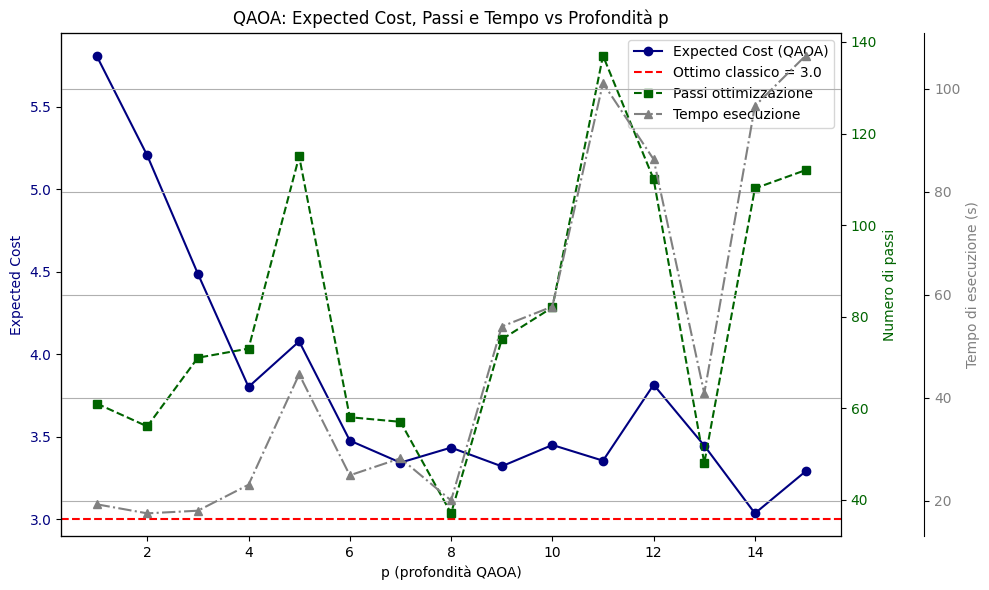

In [23]:
p_values = [res['p'] for res in results if res['expval'] is not None]
expected_costs = [res['expval'] for res in results if res['expval'] is not None]
steps = [res['n_steps'] for res in results if res['expval'] is not None]
times = [res['exec_time'] for res in results if res['expval'] is not None]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Asse Y principale - Expected cost
ax1.set_xlabel("p (profondità QAOA)")
ax1.set_ylabel("Expected Cost", color="navy")
ax1.plot(p_values, expected_costs, marker='o', color="navy", label="Expected Cost (QAOA)")
ax1.axhline(real_solution_cost, color='red', linestyle='--', label=f'Ottimo classico = {real_solution_cost}')
ax1.tick_params(axis='y', labelcolor="navy")

# Secondo asse Y - Numero di passi
ax2 = ax1.twinx()
ax2.set_ylabel("Numero di passi", color="darkgreen")
ax2.plot(p_values, steps, marker='s', linestyle='--', color="darkgreen", label="Passi ottimizzazione")
ax2.tick_params(axis='y', labelcolor="darkgreen")

# Terzo asse Y - Tempo di esecuzione
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Sposta asse a destra
ax3.set_ylabel("Tempo di esecuzione (s)", color="gray")
ax3.plot(p_values, times, marker='^', linestyle='-.', color="gray", label="Tempo esecuzione")
ax3.tick_params(axis='y', labelcolor="gray")

# Titolo e legenda
plt.title("QAOA: Expected Cost, Passi e Tempo vs Profondità p")
fig.tight_layout()

# Unione legende
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper right')

plt.grid(True)
plt.show()


Da questa analisi si evince che il giusto compromesso tra **tempo di esecuzione** e **accuratezza della soluzione** si ottiene impostando:

> \( p = 7 \)

Questo valore permette di ottenere soluzioni di buona qualità senza generare circuiti troppo profondi o costosi da eseguire, sia in simulazione che, potenzialmente, su un backend quantistico reale.


### Analisi Ottimizzatore, fissando a 7 il numero di livelli

Una volta fissata la profondità del circuito a \( p = 7 \), valore risultato ottimale nel compromesso tra accuratezza e complessità, si passa ad analizzare il comportamento dell’algoritmo QAOA **al variare dell’ottimizzatore classico**.

In questo contesto, la scelta dell’ottimizzatore ha un impatto diretto su:

- la **qualità della soluzione trovata** (valore atteso dell’Hamiltoniano)
- la **probabilità di ottenere soluzioni valide o ottime**
- la **stabilità e convergenza dell’algoritmo**, anche in presenza di rumore

---

📉 Ottimizzatori utilizzati

Sono stati testati diversi ottimizzatori appartenenti alla libreria `pennylane.optimize`, ciascuno con caratteristiche differenti:

| Ottimizzatore        | Tipo                         | Note principali                                     |
|----------------------|------------------------------|-----------------------------------------------------|
| `Adam`               | adattivo, con momentum       | Ampiamente usato nel machine learning               |
| `RMSProp`            | adattivo                     | Riduce learning rate per parametri instabili        |
| `GradientDescent`    | classico                     | Metodo base; utile come riferimento                 |
| `Adagrad`            | adattivo                     | Adatta il passo per ogni parametro                  |
| `Momentum`           | con memoria                  | Sfrutta la direzione cumulativa dei gradienti       |
| `NesterovMomentum`   | variante con "previsione"    | Spinge oltre la direzione corrente del gradiente    |
| `SPSA`               | stocastico, a basso rumore   | Ideale per ambienti rumorosi o hardware reale       |

---

📊 Criteri di confronto

L’analisi è stata condotta confrontando gli ottimizzatori secondo tre metriche principali:

1. **Valore atteso finale** dell’Hamiltoniano (expected cost): quanto è bassa la soluzione trovata
2. **Numero di passi** (iterazioni) necessari per raggiungere la convergenza
3. **Tempo totale di esecuzione** (in secondi) impiegato dall’ottimizzazione

---

🎯 Obiettivo

L’obiettivo non è solo trovare l’ottimizzatore che raggiunge il valore più basso, ma anche quello che lo fa in **meno tempo** e con **meno iterazioni**, mantenendo comunque una certa stabilità.

---

In [ ]:
def qaoa_sweep_optimizers(graph, p=7, A=2.0, B=1.0):
    node_number = max(max(u, v) for u, v in graph) + 1
    dev = qml.device("default.qubit", wires=node_number)
    cost_h = build_h_cost_vertex_cover(graph, A, B)

    optimizers_dict = {
    "Adam": qml.AdamOptimizer(stepsize=0.1),
    "RMSProp": qml.RMSPropOptimizer(stepsize=0.05),
    "GradientDescent": qml.GradientDescentOptimizer(stepsize=0.1),
    "Adagrad": qml.AdagradOptimizer(stepsize=0.1),
    "Momentum": qml.MomentumOptimizer(stepsize=0.1),
    "NesterovMomentum": qml.NesterovMomentumOptimizer(stepsize=0.1),
    "SPSA": qml.SPSAOptimizer(maxiter=200),
}

    results = []

    for name, optimizer in optimizers_dict.items():
        print(f"\n===== Ottimizzatore: {name} (p = {p}) =====")
        params = np.ones((p, 2), requires_grad=True) * 0.1

        start_time = time.time()
        final_expval, final_probs, final_params, n_steps, cost_progress = execute_QAOA(
            params, p, cost_h, optimizer
        )
        exec_time = time.time() - start_time

        bitstrings = [format(i, f"0{node_number}b") for i in range(2**node_number)]
        valid_solutions = []

        for i, bitstring in enumerate(bitstrings):
            prob = final_probs[i]
            if prob > 0 and is_valid_vertex_cover(bitstring, graph):
                cost = evaluate_vertex_cover_cost(bitstring, A, B)
                valid_solutions.append((bitstring, cost, prob))

        if valid_solutions:
            min_cost = min(c for (_, c, _) in valid_solutions)
            best_solutions = [(s, p) for (s, c, p) in valid_solutions if c == min_cost]
            feasible_prob = sum(p for (_, _, p) in valid_solutions)
            feasible_prob_not_minimal = sum(p for (_, c, p) in valid_solutions if c != min_cost)
        else:
            min_cost = None
            best_solutions = []
            feasible_prob = 0

        results.append({
            "optimizer": name,
            "expval": final_expval,
            "min_cost": min_cost,
            "best_solutions": best_solutions,
            "feasible_prob": feasible_prob,
            "feasible_prob_not_minimal": feasible_prob_not_minimal,
            "n_steps": n_steps,
            "exec_time": exec_time
        })

    return results


In [ ]:
results_qaoa = qaoa_sweep_optimizers(graph, p=7, A=A, B=B)



===== Ottimizzatore: Adam (p = 7) =====

===== Ottimizzatore: RMSProp (p = 7) =====

===== Ottimizzatore: GradientDescent (p = 7) =====


KeyboardInterrupt: 

In [ ]:
results_qaoa = [
    {
        "optimizer": "Adam",
        "expval": 3.3433,
        "min_cost": 3.0,
        "feasible_prob": 0.900,
        "n_steps": 57,
        "exec_time": 30.28,
        "feasible_prob_not_minimal": 0.1257304866497047,
        "best_solutions": [("01100001", 0.397), ("01101000", 0.377)]
    },
    {
        "optimizer": "RMSProp",
        "expval": 3.3678,
        "min_cost": 3.0,
        "feasible_prob": 0.902,
        "n_steps": 81,
        "exec_time": 45.00,
        "feasible_prob_not_minimal": 0.13887584223277674,
        "best_solutions": [("01100001", 0.411), ("01101000", 0.352)]
    },
    {
        "optimizer": "GradientDescent",
        "expval": 5.0588,
        "min_cost": 3.0,
        "feasible_prob": 0.835,
        "n_steps": 500,
        "exec_time": 284.79,
        "feasible_prob_not_minimal": 0.7188047253678823,
        "best_solutions": [("01100001", 0.060), ("01101000", 0.056)]
    },
    {
        "optimizer": "Adagrad",
        "expval": 3.2504,
        "min_cost": 3.0,
        "feasible_prob": 0.941,
        "n_steps": 129,
        "exec_time": 67.86,
        "feasible_prob_not_minimal": 0.1043260947175753,
        "best_solutions": [("01100001", 0.461), ("01101000", 0.376)]
    },
    {
        "optimizer": "Momentum",
        "expval": 7.9271,
        "min_cost": 3.0,
        "feasible_prob": 0.291,
        "n_steps": 500,
        "exec_time": 258.85,
        "feasible_prob_not_minimal": 0.28192978321287726,
        "best_solutions": [("01100001", 0.007), ("01101000", 0.002)]
    },
    {
        "optimizer": "NesterovMomentum",
        "expval": 9.0345,
        "min_cost": 3.0,
        "feasible_prob": 0.201,
        "n_steps": 500,
        "exec_time": 268.45,
        "feasible_prob_not_minimal": 0.1949077155248379,
        "best_solutions": [("01100001", 0.005), ("01101000", 0.001)]
    },
    {
        "optimizer": "SPSA",
        "expval": 5.7022,
        "min_cost": 3.0,
        "feasible_prob": 0.423,
        "n_steps": 71,
        "exec_time": 33.48,
        "feasible_prob_not_minimal": 0.328126439107493,
        "best_solutions": [("01100001", 0.039), ("01101000", 0.055)]
    }
]


In [ ]:
for res in results_qaoa:
    print("\n---------------------------------------------------")
    print(f"Ottimizzatore: {res['optimizer']}")
    print(f"Expected Cost: {res['expval']:.4f}" if res['expval'] else "N/A")
    print(f"Costo minimo trovato: {res['min_cost']}")
    print(f"Probabilità soluzioni valide: {res['feasible_prob']:.3f}")
    print(f"Passi ottimizzazione: {res['n_steps']}")
    print(f"Tempo di esecuzione: {res['exec_time']:.2f} s")
    print(f"Probabilità di avere una soluzione valida ma non minima: {res['feasible_prob_not_minimal']}")
    print("Soluzioni migliori:")
    for sol, prob in res['best_solutions']:
        print(f"  {sol} : prob = {prob:.3f}")
    print("---------------------------------------------------")


---------------------------------------------------
Ottimizzatore: Adam
Expected Cost: 3.3433
Costo minimo trovato: 3.0
Probabilità soluzioni valide: 0.900
Passi ottimizzazione: 57
Tempo di esecuzione: 30.28 s
Probabilità di avere una soluzione valida ma non minima: 0.1257304866497047
Soluzioni migliori:
  01100001 : prob = 0.397
  01101000 : prob = 0.377
---------------------------------------------------

---------------------------------------------------
Ottimizzatore: RMSProp
Expected Cost: 3.3678
Costo minimo trovato: 3.0
Probabilità soluzioni valide: 0.902
Passi ottimizzazione: 81
Tempo di esecuzione: 45.00 s
Probabilità di avere una soluzione valida ma non minima: 0.13887584223277674
Soluzioni migliori:
  01100001 : prob = 0.411
  01101000 : prob = 0.352
---------------------------------------------------

---------------------------------------------------
Ottimizzatore: GradientDescent
Expected Cost: 5.0588
Costo minimo trovato: 3.0
Probabilità soluzioni valide: 0.835
Passi 

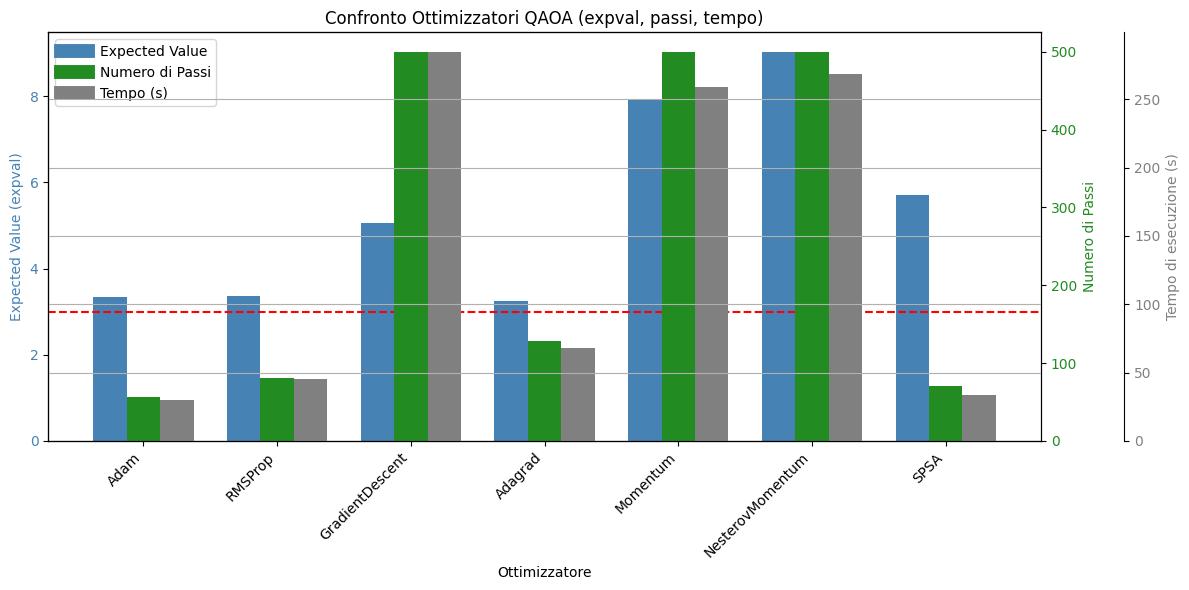

In [ ]:
optimizers = [res["optimizer"] for res in results_qaoa if res.get("expval") is not None]
expvals = [res["expval"] for res in results_qaoa if res.get("expval") is not None]
n_steps = [res["n_steps"] for res in results_qaoa if res.get("expval") is not None]
times = [res["exec_time"] for res in results_qaoa if res.get("expval") is not None]

x = numpy.arange(len(optimizers))
width = 0.25

fig, ax1 = plt.subplots(figsize=(12, 6))

# Expected value (asse principale)
bars1 = ax1.bar(x - width, expvals, width, color='steelblue')
ax1.set_ylabel('Expected Value (expval)', color='steelblue')
ax1.axhline(real_solution_cost, color='red', linestyle='--', label=f'Ottimo classico = {real_solution_cost}')
ax1.set_xlabel('Ottimizzatore')
ax1.set_xticks(x)
ax1.set_xticklabels(optimizers, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Numero di passi (asse secondario)
ax2 = ax1.twinx()
bars2 = ax2.bar(x, n_steps, width, color='forestgreen')
ax2.set_ylabel('Numero di Passi', color='forestgreen')
ax2.tick_params(axis='y', labelcolor='forestgreen')

# Tempo di esecuzione (terzo asse)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
bars3 = ax3.bar(x + width, times, width, color='gray')
ax3.set_ylabel('Tempo di esecuzione (s)', color='gray')
ax3.tick_params(axis='y', labelcolor='gray')

# Legenda (manualmente)
custom_lines = [
    plt.Line2D([0], [0], color='steelblue', lw=10),
    plt.Line2D([0], [0], color='forestgreen', lw=10),
    plt.Line2D([0], [0], color='gray', lw=10)
]
ax1.legend(custom_lines, ['Expected Value', 'Numero di Passi', 'Tempo (s)'], loc='upper left')

plt.title("Confronto Ottimizzatori QAOA (expval, passi, tempo)")
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


Da questa analisi si osserva che il miglior compromesso tra **qualità della soluzione** (in termini di valore atteso finale) e **tempo di esecuzione** è ottenuto dai seguenti ottimizzatori:

1. **AdamOptimizer**
2. **RMSPropOptimizer**
3. **AdagradOptimizer**

Questi algoritmi si sono dimostrati **efficienti sia nel convergere rapidamente**, sia nel trovare **soluzioni con basso costo atteso**, mantenendo tempi computazionali contenuti.


## ⚛️ Risoluzione con VQE

### Conversione di $H_f$ nel formato di Qiskit

In [ ]:
cost_h_qiskit = qml_to_sparse_pauli_op(cost_h, node_number)
print(cost_h_qiskit)
print(cost_h)

SparsePauliOp(['IIIIIZIZ', 'IIIIIIIZ', 'IIIIIZII', 'IIIIIIII', 'IIIIIZZI', 'IIIIIIZI', 'IIIIIZII', 'IIIIIIII', 'IIIIZZII', 'IIIIIZII', 'IIIIZIII', 'IIIIIIII', 'IIIZIZII', 'IIIIIZII', 'IIIZIIII', 'IIIIIIII', 'IIZIIIZI', 'IIIIIIZI', 'IIZIIIII', 'IIIIIIII', 'IZIIIIZI', 'IIIIIIZI', 'IZIIIIII', 'IIIIIIII', 'ZIIZIIII', 'IIIZIIII', 'ZIIIIIII', 'IIIIIIII', 'ZIIIIIZI', 'IIIIIIZI', 'ZIIIIIII', 'IIIIIIII', 'IZIIIZII', 'IIIIIZII', 'IZIIIIII', 'IIIIIIII', 'IIIIIIII', 'IIIIIIIZ', 'IIIIIIII', 'IIIIIIZI', 'IIIIIIII', 'IIIIIZII', 'IIIIIIII', 'IIIIZIII', 'IIIIIIII', 'IIIZIIII', 'IIIIIIII', 'IIZIIIII', 'IIIIIIII', 'IZIIIIII', 'IIIIIIII', 'ZIIIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5

/usr/local/lib/python3.11/dist-packages/pennylane/ops/op_math/prod.py:261: PennyLaneDeprecationWarning: Accessing the terms of a tensor product operator via op.obs is deprecated and will be removed in Pennylane v0.42. Instead, please use op.operands.
  warnings.warn(


### Definizione dell'Ansatz Two Local per VQE

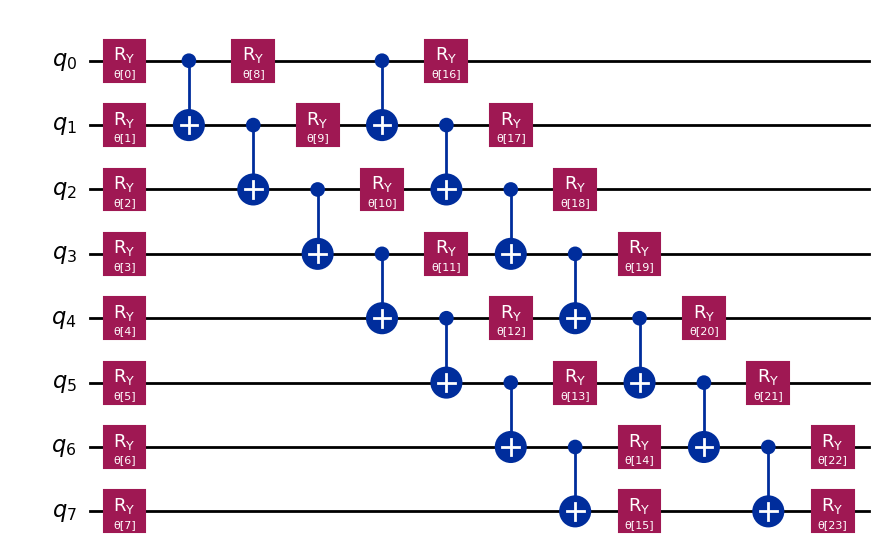

In [ ]:
def build_ansatz_twolocal(node_number,reps=2):
    circuit = TwoLocal(node_number, 'ry', 'cx', 'linear', reps=reps).decompose()
    return circuit

ansatz_tl=build_ansatz_twolocal(node_number)
ansatz_tl.draw("mpl")

### Definizione della funzione per la restituzione del costo

In [ ]:
history=[]
def init_history():
    history.clear()
def cost_func(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    energy = estimator.run([(ansatz, hamiltonian, params,0.05)]).result()[0].data.evs
    history.append(energy)
    return energy

### Esecuzione dell'algoritmo VQE con Anstaz Two Local e Ottimizzatore Cobyla

In [ ]:
init_history()
estimator = StatevectorEstimator()
ansatz=ansatz_tl
theta0 = 2 * np.pi * np.random.random(ansatz.num_parameters)
res = minimize(cost_func, theta0, args=(ansatz, cost_h_qiskit, estimator), method="cobyla", options={"maxiter":5000})
print(res)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 3.7569221960515824
       x: [ 2.107e+00  6.617e-01 ...  3.149e-01  5.640e+00]
    nfev: 251
   maxcv: 0.0


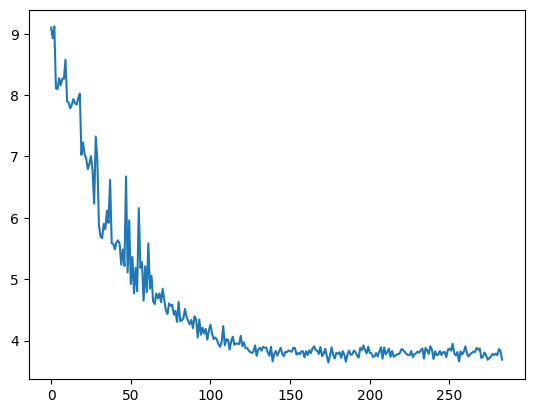

In [ ]:
plt.plot(history)

### Visualizzazione del risultato

In [ ]:
circuit=ansatz.copy()
circuit.measure_all()

In [ ]:
shots=1024
sampler = StatevectorSampler()
sampler_result=sampler.run([(circuit, res.x,shots)]).result()[0].data.meas.get_counts()

In [ ]:
f_feasible = 0
min_cost = float('inf')
best_solutions = []
best_probs = []
expected_cost = 0

print("Risultati del Sampler: \n")
for key, value in sampler_result.items():
    solution = list(reversed([int(i) for i in key]))
    bitstring = ''.join(str(b) for b in solution)
    cost = evaluate_vertex_cover_cost(bitstring, A, B)

    expected_cost += (value / shots) * cost

    if is_valid_vertex_cover(bitstring, graph):
        f_feasible += value
        if cost < min_cost:
            best_solutions.clear()
            best_probs.clear()
            best_solutions.append(bitstring)
            best_probs.append(value / shots)
            min_cost = cost
        elif cost == min_cost:
            best_solutions.append(bitstring)
            best_probs.append(value / shots)

        print(f"{solution} : {key} : prob = {value/shots:.3f}; cost = {cost}")
    else:
        pass

print("")
print("---------------------------------------------------")
print(f"\nProbabilità di trovare una soluzione valida: {f_feasible/shots:.3f}")
print(f"Probabilità di trovare una soluzione valida e minima: {sum(best_probs):.3f}")
print("---------------------------------------------------")

print("Soluzioni migliori: \n")
for solution, prob in zip(best_solutions, best_probs):
    print(f"{solution} : prob = {prob:.3f}")

print("---------------------------------------------------")
print(f"Best costo trovato: {min_cost}")
print(f"Costo REALE minimo: {real_solution_cost}")
print(f"Numero di passi impiegati dall'algoritmo: {len(history)}")
print(f"Valore atteso della funzione obiettivo: {expected_cost:.4f}")
print("---------------------------------------------------")


Risultati del Sampler: 

[0, 1, 1, 0, 0, 0, 0, 1] : 10000110 : prob = 0.562; cost = 3.0
[0, 1, 1, 0, 0, 0, 1, 1] : 11000110 : prob = 0.050; cost = 4.0
[0, 1, 1, 0, 0, 1, 0, 1] : 10100110 : prob = 0.134; cost = 4.0
[0, 1, 1, 0, 1, 0, 1, 1] : 11010110 : prob = 0.021; cost = 5.0
[0, 1, 1, 0, 1, 0, 0, 1] : 10010110 : prob = 0.045; cost = 4.0
[0, 1, 1, 0, 1, 1, 1, 1] : 11110110 : prob = 0.026; cost = 6.0
[0, 1, 1, 0, 1, 1, 1, 0] : 01110110 : prob = 0.011; cost = 5.0
[0, 1, 1, 1, 0, 1, 1, 1] : 11101110 : prob = 0.009; cost = 6.0
[0, 1, 1, 1, 0, 0, 1, 1] : 11001110 : prob = 0.009; cost = 5.0
[0, 1, 1, 1, 1, 0, 1, 1] : 11011110 : prob = 0.003; cost = 6.0
[0, 1, 1, 1, 1, 0, 0, 1] : 10011110 : prob = 0.001; cost = 5.0
[0, 1, 1, 0, 1, 1, 0, 1] : 10110110 : prob = 0.009; cost = 5.0
[0, 1, 1, 0, 1, 0, 1, 0] : 01010110 : prob = 0.007; cost = 4.0
[0, 1, 1, 1, 1, 0, 1, 0] : 01011110 : prob = 0.001; cost = 5.0
[1, 1, 1, 0, 0, 1, 0, 1] : 10100111 : prob = 0.002; cost = 5.0
[1, 1, 0, 1, 1, 0, 1, 0] : 010

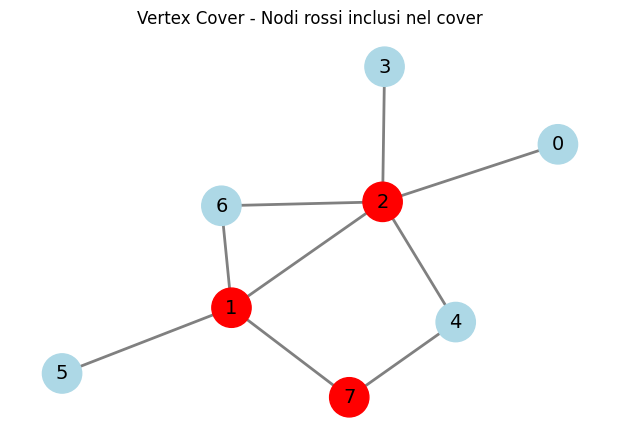

Con probabilità:  0.5625



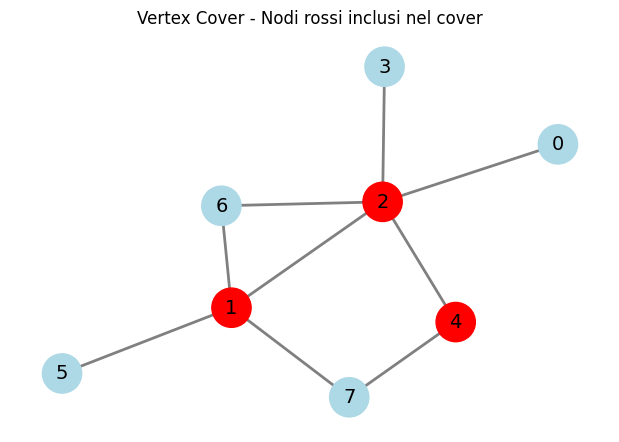

Con probabilità:  0.0009765625



In [ ]:
for soluzione,prob in zip(best_solutions,best_probs):
    plot_vertex_cover(graph, soluzione)
    print("Con probabilità: ",prob)
    print("")

### Analisi Ottimizzattore

Al fine di approfondire l’analisi, si presetano ora i risultati ottenuti variando il tipo di ottimizzatore classico impiegato nella fase di minimizzazione della funzione obiettivo.

L'obiettivo è confrontare gli ottimizzatori in termini di:

- **Tempo di esecuzione**  
- **Numero di passi** di ottimizzazione  
- **Valore finale** ottenuto dalla funzione obiettivo  

Questa comparazione aiuterà a identificare quale metodo risulti più efficiente e preciso nel contesto del VQE.

---

📉 Ottimizzatori considerati

| Ottimizzatore | Tipo                  | Note principali                                                  |
|---------------|-----------------------|-----------------------------------------------------------------|
| COBYLA        | Derivativeless        | Ottimizzatore basato su metodi di programmazione vincolata, utile per problemi non lisci o con vincoli.  |
| Powell        | Derivativeless        | Metodo di ricerca direzionale che non richiede gradienti, adatto per funzioni non differenziabili.       |
| Nelder-Mead   | Derivativeless        | Algoritmo simplex per ottimizzazione senza vincoli e senza gradienti, spesso robusto su problemi rumorosi. |
| L-BFGS-B      | Gradient-based        | Ottimizzatore quasi-Newton con vincoli, efficace su problemi lisci con gradienti disponibili o approssimabili. |
| SLSQP         | Gradient-based        | Metodo sequenziale per problemi con vincoli non lineari, combina efficienza e capacità di gestione dei vincoli. |

---

📊 Criteri di confronto

L’analisi è stata condotta confrontando gli ottimizzatori secondo tre metriche principali:

1. **Valore atteso finale** dell’Hamiltoniano (expected cost): quanto è bassa la soluzione trovata
2. **Numero di passi** (iterazioni) necessari per raggiungere la convergenza
3. **Tempo totale di esecuzione** (in secondi) impiegato dall’ottimizzazione

---

🎯 Obiettivo

L’obiettivo non è solo trovare l’ottimizzatore che raggiunge il valore più basso, ma anche quello che lo fa in **meno tempo** e con **meno iterazioni**, mantenendo comunque una certa stabilità.

---

In [ ]:
def vqe_sweep_optimizers(graph, hamiltonian, shots=1024, A=2.0, B=1.0):

    methods = ["COBYLA", "Powell", "Nelder-Mead", "L-BFGS-B", "SLSQP"]
    results = []

    for method in methods:

        print(f"\n===== Ottimizzatore: {method} =====")
        estimator = StatevectorEstimator()
        ansatz = build_ansatz_twolocal(node_number)
        theta0 = 2 * numpy.pi * np.random.random(ansatz.num_parameters)
        history = []

        def cost_func(params, ansatz, hamiltonian, estimator):
            energy = estimator.run([(ansatz, hamiltonian, params,0.05)]).result()[0].data.evs
            history.append(energy)
            return energy

        try:
            start_time = time.time()
            res = minimize(cost_func, theta0, args=(ansatz, hamiltonian, estimator),
                           method=method, options={"maxiter": 5000})
            exec_time = time.time() - start_time

            circuit=ansatz.copy()
            circuit.measure_all()

            sampler = StatevectorSampler()

            sampler_result=sampler.run([(circuit, res.x,shots)]).result()[0].data.meas.get_counts()

            best_solutions = []
            min_cost = float("inf")
            f_feasible = 0
            expected_cost = 0

            all_feasible = 0
            all_feasible_non_optimal = 0

            for bitstring_rev, count in sampler_result.items():
                bitstring = ''.join(reversed(bitstring_rev))
                prob = count / shots
                cost = evaluate_vertex_cover_cost(bitstring, A, B)
                expected_cost += prob * cost

                if is_valid_vertex_cover(bitstring, graph):
                    f_feasible += count
                    if cost < min_cost:
                        best_solutions = [(bitstring, prob)]
                        min_cost = cost
                    elif cost == min_cost:
                        best_solutions.append((bitstring, prob))
                    else:
                        all_feasible_non_optimal += count
                    all_feasible += count

            results.append({
                "optimizer": method,
                "expected_energy": res.fun,
                "min_cost": min_cost,
                "best_solutions": best_solutions,
                "feasible_prob": f_feasible / shots,
                "feasible_prob_minimal": sum(prob for _, prob in best_solutions),
                "exec_time": exec_time,
                "n_iter": len(history)
            })

        except Exception as e:
            print(f"Errore con {method}: {e}")
            results.append({
                "optimizer": method,
                "error": str(e)
            })

    return results


In [ ]:
vqe_results = vqe_sweep_optimizers(graph, cost_h_qiskit)


===== Ottimizzatore: COBYLA =====

===== Ottimizzatore: Powell =====

===== Ottimizzatore: Nelder-Mead =====

===== Ottimizzatore: L-BFGS-B =====

===== Ottimizzatore: SLSQP =====


In [ ]:
for res in vqe_results:
    print("\n---------------------------------------------------")
    print(f"Ottimizzatore: {res['optimizer']}")
    if "error" in res:
        print(f"⚠️ Errore: {res['error']}")
    else:
        print(f"Expected energy (Hamiltoniano): {res['expected_energy']:.4f}")
        print(f"Costo minimo trovato: {res['min_cost']}")
        print(f"Probabilità soluzioni valide: {res['feasible_prob']:.3f}")
        print(f"Probabilità di avere una soluzione valida e minima: {res['feasible_prob_minimal']}")
        print(f"Numero iterazioni: {res['n_iter']}")
        print(f"Tempo di esecuzione: {res['exec_time']:.2f} s")
        print("Soluzioni migliori:")
        for sol, prob in res['best_solutions']:
            print(f"  {sol} : prob = {prob:.3f}")
    print("---------------------------------------------------")



---------------------------------------------------
Ottimizzatore: COBYLA
Expected energy (Hamiltoniano): 4.2043
Costo minimo trovato: 3.0
Probabilità soluzioni valide: 0.875
Probabilità di avere una soluzione valida e minima: 0.41015625
Numero iterazioni: 296
Tempo di esecuzione: 1.84 s
Soluzioni migliori:
  01100001 : prob = 0.410
---------------------------------------------------

---------------------------------------------------
Ottimizzatore: Powell
Expected energy (Hamiltoniano): 3.2115
Costo minimo trovato: 3.0
Probabilità soluzioni valide: 0.971
Probabilità di avere una soluzione valida e minima: 0.8818359375
Numero iterazioni: 1571
Tempo di esecuzione: 10.46 s
Soluzioni migliori:
  01100001 : prob = 0.882
---------------------------------------------------

---------------------------------------------------
Ottimizzatore: Nelder-Mead
Expected energy (Hamiltoniano): 4.6094
Costo minimo trovato: 3.0
Probabilità soluzioni valide: 0.310
Probabilità di avere una soluzione vali

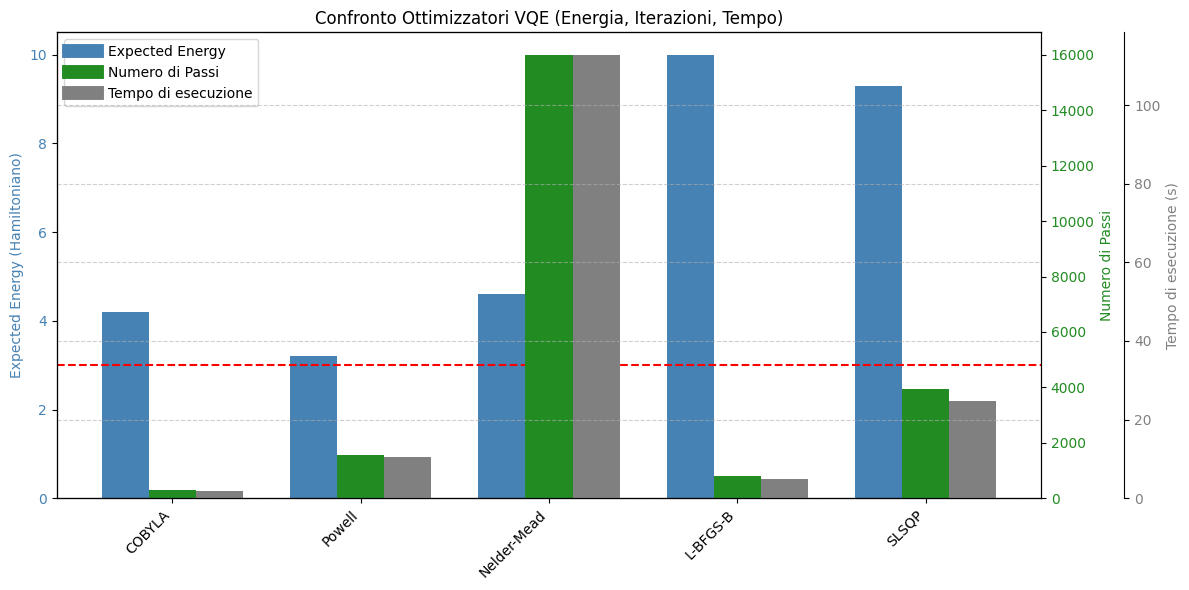

In [ ]:
optimizers = [r["optimizer"] for r in vqe_results if "error" not in r]
expvals = [r["expected_energy"] for r in vqe_results if "error" not in r]
n_steps = [r["n_iter"] for r in vqe_results if "error" not in r]
exec_times = [r["exec_time"] for r in vqe_results if "error" not in r]

x = numpy.arange(len(optimizers))
width = 0.25

fig, ax1 = plt.subplots(figsize=(12, 6))

# Barre: Expected Energy
bars1 = ax1.bar(x - width, expvals, width, color='steelblue', label='Expected Energy')
ax1.set_ylabel('Expected Energy (Hamiltoniano)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(x)
ax1.set_xticklabels(optimizers, rotation=45, ha='right')

# Barre: Numero di passi (secondo asse y)
ax2 = ax1.twinx()
bars2 = ax2.bar(x, n_steps, width, color='forestgreen', label='Numero di Passi')
ax2.set_ylabel('Numero di Passi', color='forestgreen')
ax2.tick_params(axis='y', labelcolor='forestgreen')

# Barre: Tempo di esecuzione (terzo asse y)
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))
bars3 = ax3.bar(x + width, exec_times, width, color='gray', label='Tempo di esecuzione (s)')
ax3.set_ylabel('Tempo di esecuzione (s)', color='gray')
ax3.tick_params(axis='y', labelcolor='gray')


custom_lines = [
    plt.Line2D([0], [0], color='steelblue', lw=10),
    plt.Line2D([0], [0], color='forestgreen', lw=10),
    plt.Line2D([0], [0], color='gray', lw=10)
]

ax1.legend(custom_lines, ['Expected Energy', 'Numero di Passi', 'Tempo di esecuzione'], loc='upper left')
ax1.axhline(real_solution_cost, color='red', linestyle='--', label=f'Ottimo classico = {real_solution_cost}')


plt.title("Confronto Ottimizzatori VQE (Energia, Iterazioni, Tempo)")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Da questa analisi si osserva che il miglior compromesso tra **qualità della soluzione** (in termini di valore atteso finale) e **tempo di esecuzione** è ottenuto dai seguenti ottimizzatori:

1. **Cobyla**
2. **Powell**

## ⚔️ VQE vs QAOA

Dopo aver analizzato singolarmente le prestazioni di **VQE** e **QAOA** nelle diverse configurazioni, considerando i vari ottimizzatori e la profondità dei circuiti (per QAOA), si procede ora a un confronto diretto tra i due algoritmi.

In particolare, si seleziona per ciascun algoritmo la configurazione ottimale in termini di accuratezza (valore atteso più basso) e efficienza (tempo di esecuzione più contenuto).

Il confronto si basa su:

- Il **valore atteso della funzione obiettivo**, che rappresenta la qualità della soluzione ottenuta  
- Il **tempo totale impiegato per la simulazione**, indicativo dell’efficienza computazionale

> Questo confronto permette di valutare quale algoritmo, nelle migliori condizioni, risulti più vantaggioso per il problema considerato.

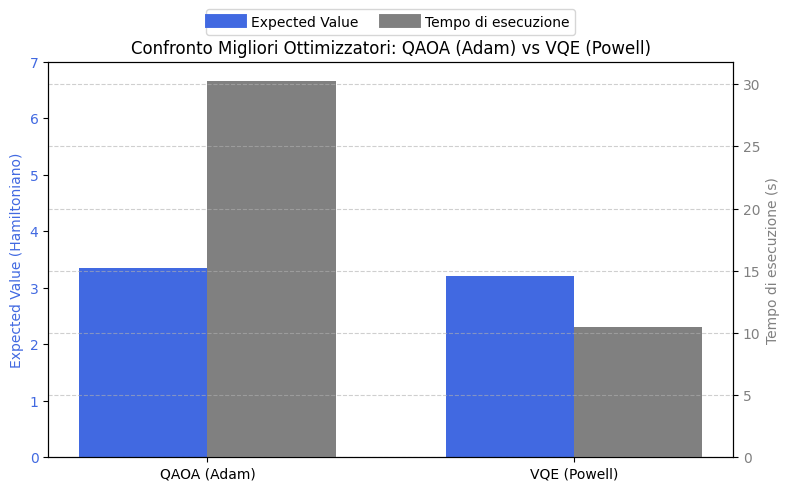

In [ ]:
qaoa_adam = next(r for r in results_qaoa if r["optimizer"] == "Adam")

vqe_powell = next(r for r in vqe_results if r["optimizer"] == "Powell")

labels = ["QAOA (Adam)", "VQE (Powell)"]
expvals = [qaoa_adam["expval"], vqe_powell["expected_energy"]]
exec_times = [qaoa_adam["exec_time"], vqe_powell["exec_time"]]

x = numpy.arange(len(labels))
width = 0.35

fig, ax1 = plt.subplots(figsize=(8, 5))

# Barre: Expected value (Hamiltoniano)
bars1 = ax1.bar(x - width/2, expvals, width, color='royalblue', label='Expected Value')
ax1.set_ylabel('Expected Value (Hamiltoniano)', color='royalblue')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.set_ylim(0, 7)

# Barre: Tempo di esecuzione (secondo asse y)
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, exec_times, width, color='gray', label='Tempo esecuzione (s)')
ax2.set_ylabel('Tempo di esecuzione (s)', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

custom_lines = [
    plt.Line2D([0], [0], color='royalblue', lw=10),
    plt.Line2D([0], [0], color='gray', lw=10)
]

ax1.legend(custom_lines, ['Expected Value', 'Tempo di esecuzione'],
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.title("Confronto Migliori Ottimizzatori: QAOA (Adam) vs VQE (Powell)")
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


## 💻 VQE con IBM Qiskit Runtime

Per validare ulteriormente i risultati ottenuti in simulazione, l'algoritmo **VQE** è stato eseguito anche su una macchina quantistica reale fornita da **IBM Quantum**.

Questa sperimentazione rappresenta un importante passo verso la dimostrazione pratica delle potenzialità del quantum computing, evidenziando come l’algoritmo si comporti in un contesto reale, soggetto a rumore e vincoli tecnologici.

### Definzione della funzione di costo

In [13]:
history=[]
def costo(theta, sampler, circuit, shots):
    """
    Funzione obiettivo per VQE su backend reale IBM.
    Calcola il costo atteso sulla distribuzione delle misurazioni reali.

    Args:
        theta (array): parametri del circuito parametrico
        sampler (IBMSampler): Sampler IBM su backend reale
        circuit (QuantumCircuit): circuito parametrico transpiled
        shots (int): numero di misure da eseguire

    Returns:
        float: costo atteso da minimizzare
    """
    # Esecuzione quantistica
    job = sampler.run([(circuit, theta, shots)])
    counts = Counts(job.result()[0].data.meas.get_counts()).int_outcomes()

    # Calcolo del costo atteso
    total_cost = 0
    total_shots = sum(counts.values())

    for bit_int, count in counts.items():
        # Converte intero in bitstring
        bitstring = format(bit_int, f"0{node_number}b")[::-1]
        cost = evaluate_vertex_cover_cost(bitstring, A, B)
        total_cost += cost * count

    expected_cost = total_cost / total_shots
    print(f"Expected cost: {expected_cost:.4f}")
    history.append(expected_cost)
    return expected_cost


### Autenticazione su IBM Cloud

In [14]:
api_key = "REDACTED"
crn = "REDACTED"
service = QiskitRuntimeService(channel="ibm_cloud", token=api_key, instance=crn)

### Definzione dell'Ansatz

In [15]:
num_qubit = node_number
circuit = TwoLocal(num_qubit, "ry", "cx", entanglement="linear", reps=2, insert_barriers=True).decompose()
circuit.measure_all()

### Connessione al Backend e consegenute transpiling del circuito

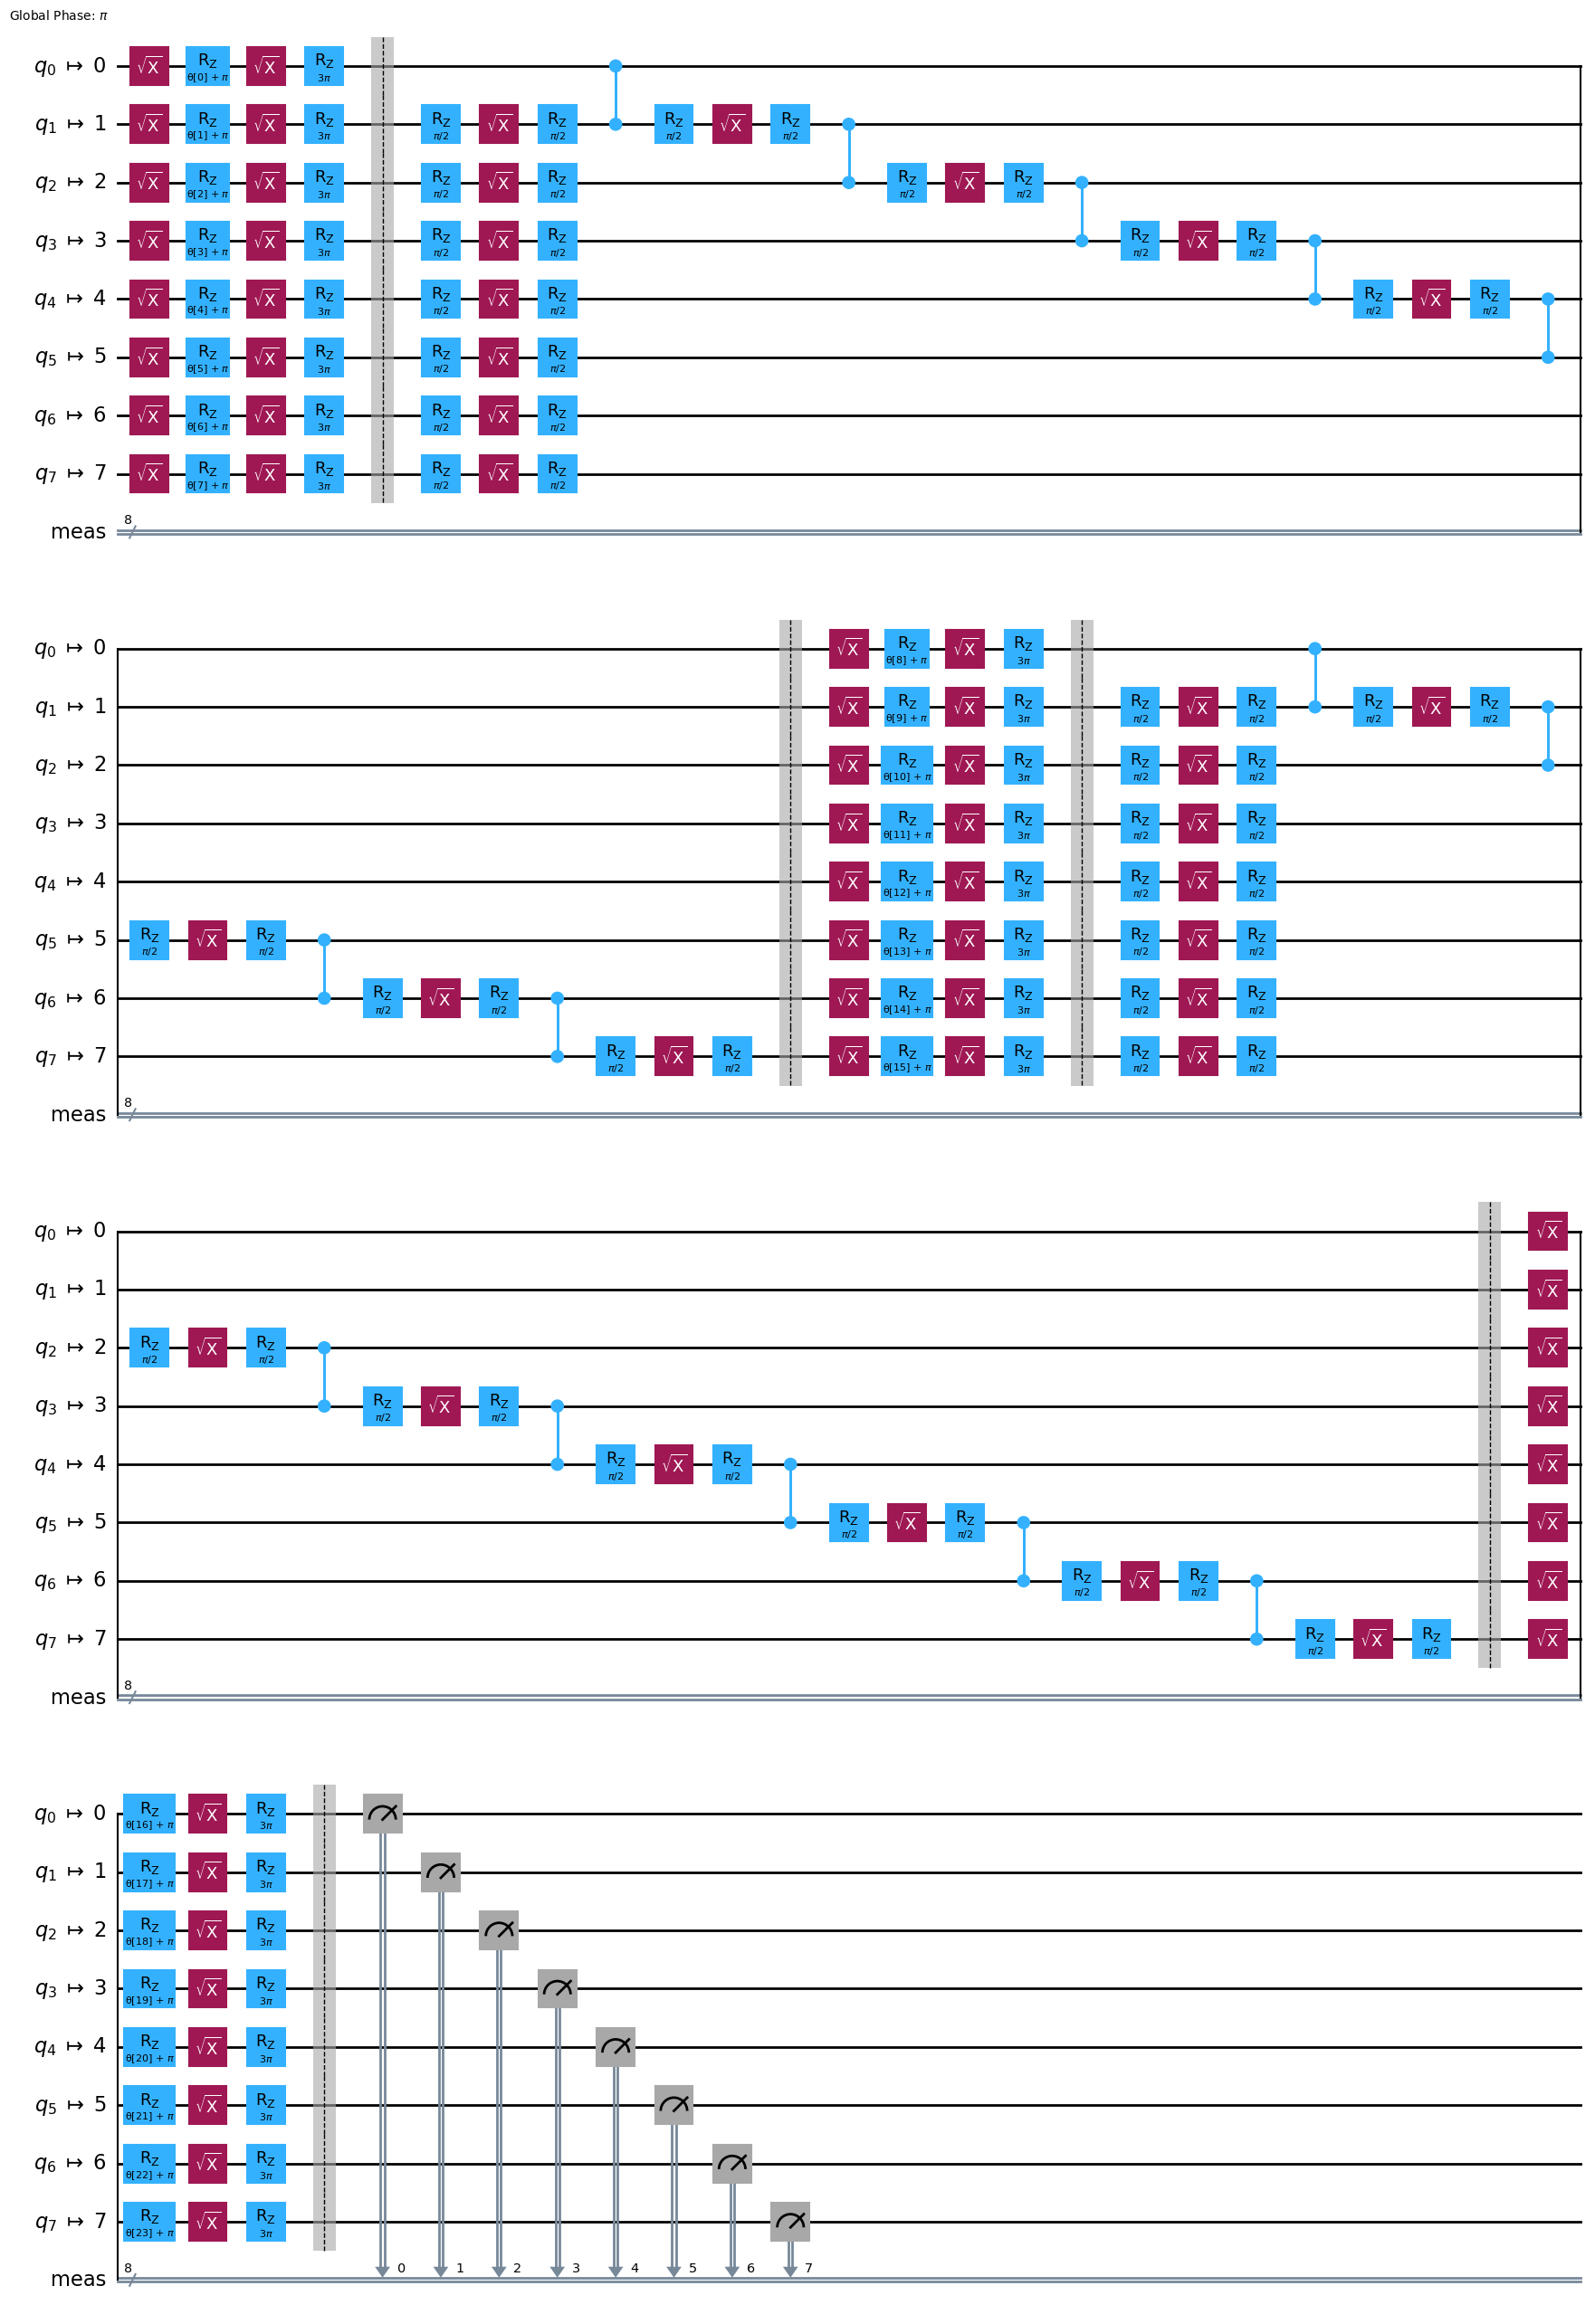

In [16]:
real_backend = service.backend("ibm_torino")
pm = generate_preset_pass_manager(backend=real_backend, optimization_level=1)
circuit_isa = pm.run(circuit)
circuit_isa.draw(output='mpl')

### Esecuzione dell'algoritmo

In [24]:
sampler = IBMSampler(mode=real_backend)
theta0 = 2 * numpy.pi * numpy.random.random(circuit_isa.num_parameters)
shots=1024
res = minimize(
    costo,
    theta0,
    args=(sampler, circuit_isa, shots),
    method="COBYLA",
    options={"maxiter": 150}
)

In [19]:
#per evitare di rieseguire
history = [
    9.2783, 9.3281, 9.7959, 9.4805, 9.2754, 9.2529, 8.9414, 9.2920, 8.6309, 8.4697,
    8.1895, 7.4150, 7.9385, 7.4805, 7.5029, 7.7490, 7.5029, 7.7607, 8.1123, 8.2129,
    7.6230, 7.4658, 7.5410, 7.6133, 7.4502, 7.0410, 7.9971, 7.3223, 7.0400, 7.1660,
    6.8535, 7.0439, 6.9150, 7.4570, 6.7354, 6.8496, 6.7471, 7.1172, 6.8418, 6.7764,
    6.5264, 6.4131, 6.6162, 6.3311, 6.5693, 6.5664, 6.7002, 6.6973, 6.5938, 6.5459,
    6.7275, 6.6006, 6.9688, 6.5186, 6.8184, 6.5029, 6.5615, 6.3135, 6.7275, 6.4609,
    6.3203, 6.5381, 6.4180, 6.4160, 6.5576, 6.2295, 6.2637, 6.2490, 6.3760, 6.4990,
    6.2949, 6.2295, 6.1963, 6.4482, 6.3643, 6.3311, 6.2998, 6.2793, 6.2617, 6.0469,
    6.1201, 6.1221, 6.2588, 6.1641, 6.3770, 5.9961, 6.2344, 6.0166, 6.1562, 6.1992,
    6.5078, 6.2676, 6.1885, 6.3604, 6.2090, 6.3311, 6.3848, 6.2373, 6.1572, 6.0898,
    6.1523, 6.2568, 6.1992, 6.2871, 6.0107, 6.1680, 6.1670, 6.1240, 6.0693, 6.3545,
    6.1924, 6.2705, 6.2529, 6.1201, 6.3506, 6.2061, 6.0557, 6.0645, 6.0713, 6.2432,
    6.0957, 6.2539, 6.1807, 6.2832, 6.2607, 6.3438, 6.1836, 6.1006, 6.1748, 6.2617,
    6.1865, 6.1592, 6.1719, 6.3330, 6.3809, 6.3223, 6.3760, 6.4375, 6.1768, 6.2373,
    6.2988, 6.2305, 6.2568, 6.0967, 6.3154, 6.2100
]

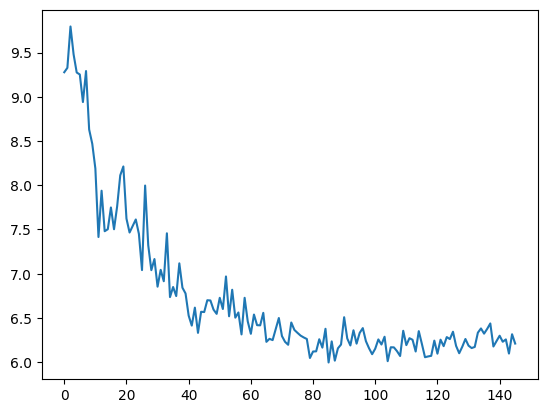

In [20]:
plt.plot(history)

In [49]:
print(res.x)

[ 2.71671877  1.98615201  3.3603866   5.79614284  1.71368858  1.46297374
  6.25482126  1.52480439  2.65289977  0.84594722  5.23853608  3.77591582
  5.1942623   5.32578092 -0.7979992   2.14020829  2.89489412  2.75828814
  1.48904867  4.55209773  2.9498148   1.50275207  2.84514945  1.49279535]


In [45]:
circuit = circuit_isa.copy()
circuit.measure_all()
sampler = IBMSampler(mode=real_backend)

job = sampler.run([(circuit, res.x, shots)])
counts = job.result()[0].data.meas.get_counts()
print(counts)

{'01011100': 1, '00101111': 71, '01110011': 18, '00011011': 3, '10100110': 14, '01110111': 45, '11110111': 24, '11110001': 9, '01110100': 14, '00101001': 9, '00101011': 27, '01111110': 25, '01011111': 1, '00100111': 120, '11111100': 4, '01111011': 22, '00110111': 16, '00100010': 18, '10100111': 33, '11111101': 8, '10101101': 5, '10101111': 19, '10101110': 7, '10001101': 1, '01110110': 9, '00100011': 23, '00001011': 2, '01110001': 13, '00100110': 21, '00100001': 23, '01110101': 9, '11111011': 10, '01111111': 15, '00100000': 2, '00111111': 4, '00101101': 11, '01111001': 24, '01100111': 9, '00101100': 4, '00100100': 14, '01111100': 15, '10100001': 4, '11101111': 2, '11110010': 3, '01010101': 1, '11110011': 5, '11111010': 2, '11100111': 2, '01000111': 5, '11011100': 2, '11111110': 6, '01101111': 7, '00100101': 8, '01101001': 2, '01000100': 1, '01111000': 11, '01111101': 26, '00101110': 17, '01001111': 2, '00111100': 3, '11010111': 3, '11111001': 8, '00000011': 2, '00101000': 5, '10100101':

In [37]:
#per evitare di rieseguire la macchina reale, salvo i risultati ottenuti
counts = {'01111000': 5, '10011100': 4, '10011101': 7, '10010001': 3, '11101111': 4, '01101111': 12, '00010011': 4, '01100101': 3, '00011100': 6, '11000000': 7, '01000111': 6, '01011001': 2, '10101110': 5, '11010010': 4, '11000100': 11, '01001110': 2, '10111011': 3, '11101101': 5, '01111011': 5, '00000110': 5, '11110001': 9, '10011000': 4, '01110101': 5, '11011100': 5, '11001101': 4, '11011010': 5, '00111101': 8, '10010101': 7, '10111010': 7, '01011100': 5, '10100001': 6, '10010011': 4, '10100111': 2, '00010111': 6, '00100101': 4, '00011001': 4, '11100001': 5, '01000110': 6, '11111001': 2, '10001010': 4, '00000001': 5, '00000111': 6, '10101100': 2, '11110010': 5, '01100011': 4, '01001000': 6, '10110111': 4, '00110101': 6, '11111100': 5, '11011000': 7, '00001100': 2, '11001010': 5, '10110011': 4, '11000010': 3, '01111110': 11, '00111100': 3, '10001101': 2, '00101001': 11, '10001001': 5, '00110001': 7, '00100001': 3, '01110001': 2, '00100100': 4, '00100110': 9, '10010000': 3, '00010001': 3, '10011110': 5, '00101111': 5, '01001100': 7, '10000000': 6, '10111100': 3, '11000110': 3, '01001001': 3, '01101010': 5, '10110000': 6, '00110011': 4, '00000101': 5, '10101111': 5, '00001001': 3, '11000011': 4, '11001100': 2, '01111010': 7, '01110011': 8, '11111110': 6, '00001011': 2, '11011110': 3, '01111101': 1, '00111110': 6, '00111111': 5, '11001011': 2, '01110110': 2, '10111111': 4, '10100110': 4, '10001110': 6, '11010110': 9, '10010100': 2, '00001110': 6, '11110110': 8, '00001111': 2, '00011101': 3, '11001000': 9, '00010110': 7, '11101001': 6, '11010100': 4, '01100110': 5, '00100010': 7, '10100101': 4, '10011001': 4, '01101101': 2, '11011111': 4, '01100000': 5, '11100110': 3, '11111111': 2, '01111111': 4, '11011001': 3, '00110111': 7, '00110000': 5, '10000111': 4, '11110101': 4, '01011111': 5, '10110110': 3, '11001111': 9, '00111011': 5, '00101101': 1, '10011011': 4, '10011111': 5, '00001101': 6, '01101110': 8, '11111000': 5, '11110100': 2, '00110100': 6, '01110000': 4, '11100101': 4, '00000010': 7, '01110100': 2, '01100111': 1, '00000011': 4, '11011101': 4, '01010100': 3, '01010011': 8, '01100100': 7, '10100011': 4, '11101000': 1, '01101001': 6, '00010010': 5, '11000001': 8, '01011010': 2, '10101000': 5, '01111001': 4, '01010101': 5, '00011000': 6, '01010111': 3, '00100011': 3, '11011011': 5, '11010101': 4, '00010100': 6, '00011011': 4, '11000101': 3, '00011110': 3, '10011010': 3, '01111100': 3, '10100010': 3, '10101101': 3, '00000000': 2, '01011011': 3, '10111101': 4, '01010000': 3, '00111010': 4, '01101000': 3, '01101100': 5, '00101110': 4, '00110110': 3, '10101001': 4, '11001001': 3, '10000010': 5, '01011101': 2, '11010111': 3, '11110000': 9, '10010111': 5, '11010000': 3, '10000011': 3, '01110010': 4, '01001111': 8, '10110100': 3, '11100010': 1, '01010001': 5, '00101000': 7, '01110111': 3, '10110001': 3, '01000011': 4, '10010010': 6, '11100100': 1, '10000001': 2, '00100111': 1, '00111001': 1, '00001000': 2, '11000111': 2, '10001111': 3, '01000000': 1, '11001110': 4, '00101100': 4, '00100000': 5, '10111000': 5, '11110011': 1, '01001011': 5, '11100011': 1, '10101010': 3, '01000100': 3, '00011010': 4, '11101011': 3, '10100100': 2, '11111101': 3, '10000100': 4, '00000100': 3, '11111010': 3, '01010110': 4, '11101100': 2, '11101010': 4, '11101110': 4, '01000101': 3, '00111000': 4, '10100000': 2, '00101011': 3, '10110101': 3, '11110111': 5, '10001100': 5, '11010001': 2, '00010101': 6, '11010011': 4, '11111011': 4, '10101011': 4, '10001000': 4, '00110010': 3, '10110010': 3, '10000101': 4, '01011110': 2, '10001011': 3, '01000001': 1, '10111110': 1, '01010010': 3, '11100111': 3, '00011111': 3, '00001010': 2, '11100000': 1, '01000010': 2, '00010000': 1, '01001010': 1, '01011000': 1, '00101010': 1}

### Visualizzazione del risultato

In [38]:
f_feasible = 0
min_cost = float('inf')
best_solutions = []
best_probs = []
expected_cost = 0

print("Risultati del Sampler (macchina reale): \n")

for key, value in counts.items():
    solution = list(reversed([int(i) for i in key]))  # reverse per compatibilità
    bitstring = ''.join(str(b) for b in solution)
    cost = evaluate_vertex_cover_cost(bitstring, A, B)
    prob = value / 1024

    expected_cost += prob * cost

    if is_valid_vertex_cover(bitstring, graph):
        f_feasible += value
        if cost < min_cost:
            best_solutions = [(bitstring, prob)]
            min_cost = cost
        elif cost == min_cost:
            best_solutions.append((bitstring, prob))

    print(f"{bitstring} : prob = {prob:.3f}; cost = {cost}")


Risultati del Sampler (macchina reale): 

00011110 : prob = 0.005; cost = 10.0
00111001 : prob = 0.004; cost = 8.0
10111001 : prob = 0.007; cost = 9.0
10001001 : prob = 0.003; cost = 13.0
11110111 : prob = 0.004; cost = 7.0
11110110 : prob = 0.012; cost = 8.0
11001000 : prob = 0.004; cost = 7.0
10100110 : prob = 0.003; cost = 8.0
00111000 : prob = 0.006; cost = 9.0
00000011 : prob = 0.007; cost = 12.0
11100010 : prob = 0.006; cost = 6.0
10011010 : prob = 0.002; cost = 10.0
01110101 : prob = 0.005; cost = 5.0
01001011 : prob = 0.004; cost = 8.0
00100011 : prob = 0.011; cost = 5.0
01110010 : prob = 0.002; cost = 6.0
11011101 : prob = 0.003; cost = 8.0
10110111 : prob = 0.005; cost = 6.0
11011110 : prob = 0.005; cost = 6.0
01100000 : prob = 0.005; cost = 4.0
10001111 : prob = 0.009; cost = 9.0
00011001 : prob = 0.004; cost = 13.0
10101110 : prob = 0.005; cost = 7.0
00111011 : prob = 0.005; cost = 7.0
10110011 : prob = 0.004; cost = 7.0
01011011 : prob = 0.005; cost = 7.0
10111100 : prob =

In [39]:
print("\n---------------------------------------------------")
print(f"Probabilità di ottenere una soluzione valida: {f_feasible / shots:.3f}")
print(f"Probabilità di ottenere una valida e minima: {sum(p for (_, p) in best_solutions):.3f}")
print(f"Expected cost (valore atteso): {expected_cost:.4f}")
print(f"Best costo trovato: {min_cost}")
print(f"Costo reale minimo (classico): {real_solution_cost}")
print("---------------------------------------------------\n")

print("Soluzioni migliori:")
for solution, prob in best_solutions:
    print(f"{solution} : prob = {prob:.3f}")



---------------------------------------------------
Probabilità di ottenere una soluzione valida: 0.239
Probabilità di ottenere una valida e minima: 0.007
Expected cost (valore atteso): 8.5713
Best costo trovato: 3.0
Costo reale minimo (classico): 3.0
---------------------------------------------------

Soluzioni migliori:
01101000 : prob = 0.007


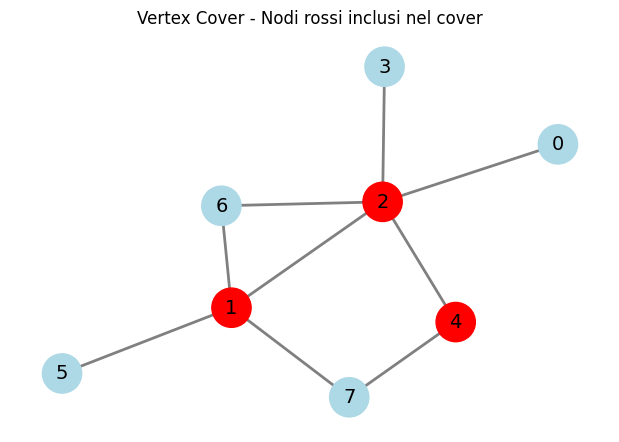

Con probabilità: 0.007


In [40]:
for solution, prob in best_solutions:
    plot_vertex_cover(graph, solution)
    print(f"Con probabilità: {prob:.3f}")

Le **prestazioni limitate** riscontrate sono principalmente dovute al numero ridotto di iterazioni consentite, legato ai **pochi minuti di accesso gratuito** offerti dalla piattaforma IBM Quantum. Per questo motivo, non è stato possibile effettuare un’analisi più approfondita.

Nonostante ciò, l’esempio presentato ha l’obiettivo di mostrare concretamente la fattibilità dell’esecuzione di VQE su hardware quantistico reale e la possibilità di ottenere risultati direttamente dalla macchina.